# All Types of Argo/EM-APEX Temperature/Salinity Density Graphs (Built-In + My Own Flare)

In [1]:
#All the imports I utalized to allow any code to run across any of my notebooks, mostly for Argo data
import xarray as xr
xr.set_options(display_style="html", display_expand_attrs=False);
from matplotlib import pyplot as plt
plt.style.use('default')
import cartopy
import cartopy.crs as ccrs
import argopy
import numpy as np
import os, shutil
import pandas as pd
from pathlib import Path
import seawater as sw

from argopy import DataFetcher as ArgoDataFetcher
argo_loader = ArgoDataFetcher(src='erddap', parallel=True)

from argopy import IndexFetcher as ArgoIndexFetcher

from argopy.plot import scatter_map
from argopy import IndexFetcher as ArgoIndexFetcher
from argopy import OceanOPSDeployments
from argopy import TopoFetcher

Don't forget to upload the EM-APEX float data as well, altering the paths based on your own directory!

In [2]:
#Generally if I use this dataset, I will include the following in the beginning of the notebook:
EM_APEX_CTD = r"C:\Users\lily\Documents\ElizabethFiles2023\DINO SIP Documents\ctd_points_allexperiments.parquet" #Make sure to replace the path with your own depending on where you stored the file in your directories!
EM_APEX_CTDdata_df = pd.read_parquet(EM_APEX_CTD)
EM_SMILE_df = EM_APEX_CTDdata_df.loc[EM_APEX_CTDdata_df["experiment"] == 'SMILE'] 

#This is how you split the dataset up into sections of the SMILE experiment.

Section_1 = ["4968s1", "4970s1", "6669s1", "6677s1", "6680s1", "7493s1", "7495s1", "7805s1", "7805s1a", "7806s1"]

Section_2 = ["4392s2", "4968s2", "4970s2", "6668s2", "6669s2", "6670s2", "6677s2", "6679s2", "6680s2", "7493s2", "7494s2", "7495s2", "7800s2", "7802s2", "7804s2", "7805s2", "7806s2"]

Section_3 = ["4392s3", "4968s3", "4970s3", "6665s3", "6668s3", "6669s3", "6670s3", "6673s3", "6676s3", "6677s3", "6679s3", "7494s3", "7493s3", "7800s3", "7801s3", "7802s3", "7803s3", "7804s3", "7805s3", "7806s3", "7807s3", "7808s3"]

EM_SMILE_dfR1 = EM_SMILE_df.loc[(EM_SMILE_df['deployment'].isin(Section_1)) & (EM_SMILE_df["S"] >= 33)] 
#EM_SMILE_df1 represents region #1 of EM-APEX data, with salinity greater than 33 to get rid of surface outliers.

EM_SMILE_dfR2 = EM_SMILE_df.loc[(EM_SMILE_df['deployment'].isin(Section_2)) & (EM_SMILE_df["S"] >= 33)] 
#EM_SMILE_df2 represents region #2 of EM-APEX data, with salinity greater than 33 to get rid of surface outliers.

EM_SMILE_dfR3 = EM_SMILE_df.loc[(EM_SMILE_df['deployment'].isin(Section_3)) & (EM_SMILE_df["S"] >= 33)] 
#EM_SMILE_df3 represents region #3 of EM-APEX data, with salinity greater than 33 to get rid of surface outliers.



## T/S Diagrams of Chosen Argo Floats in Set Geographical Bounds & 2017!

Recall that our focus regions include:

Region #1:
5903608, 5904977, 4902947 (2017 isn't in geogrpahical bounds), 4902935 (2017 isn't in geographcial bounds), 5903603 (2017 isn't in geographical bounds)

Region #2:
5904128, 4902149

Region #3:
4900816, 4902251

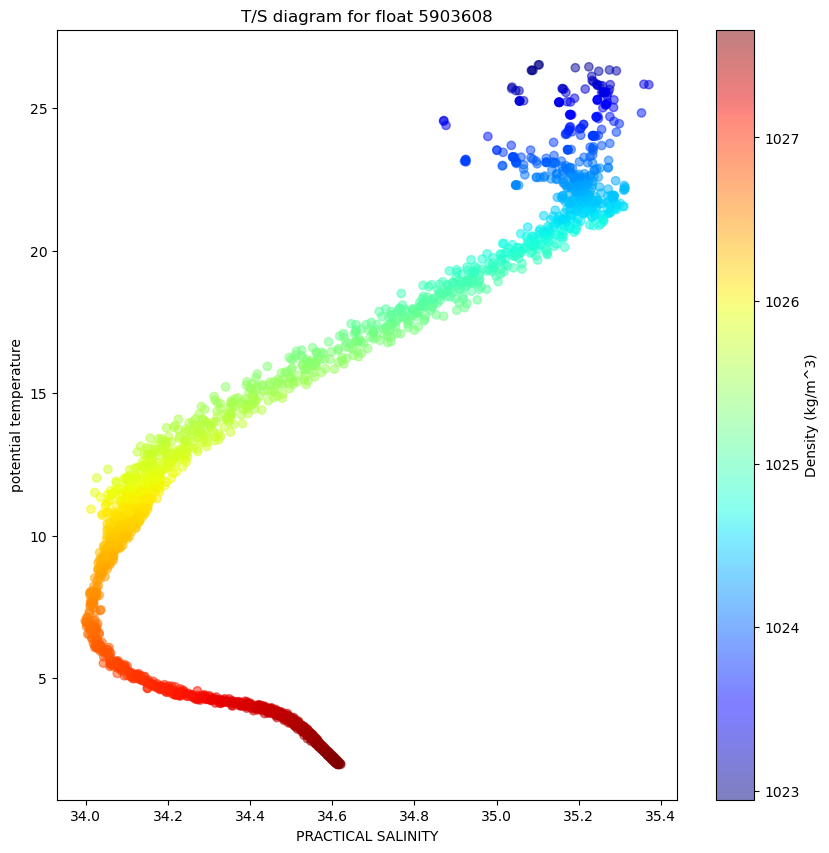

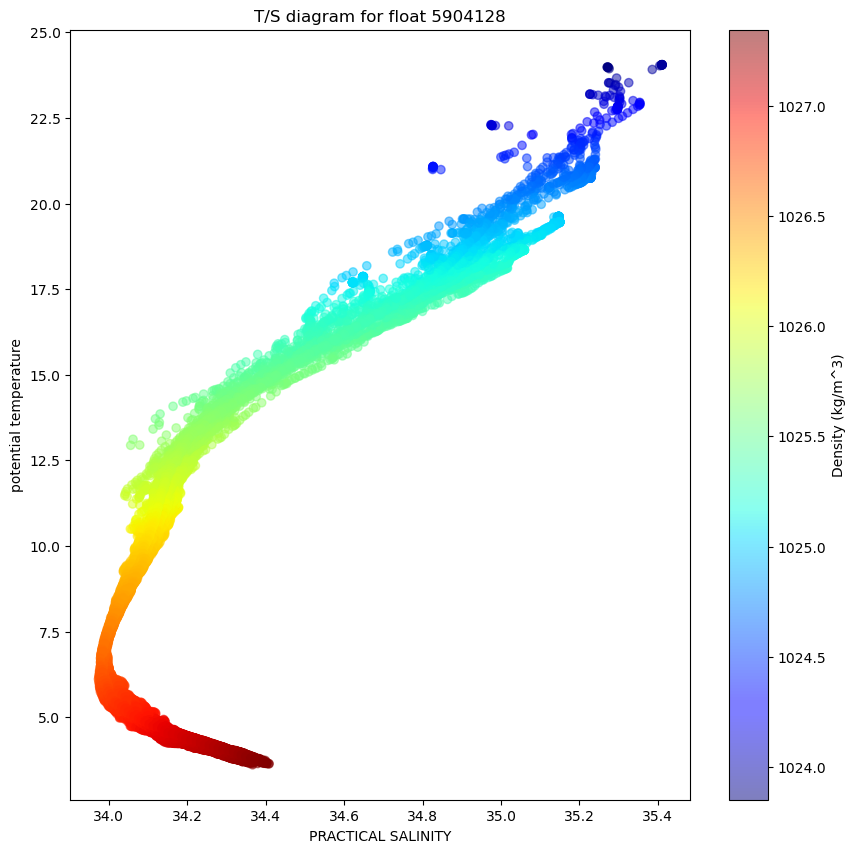

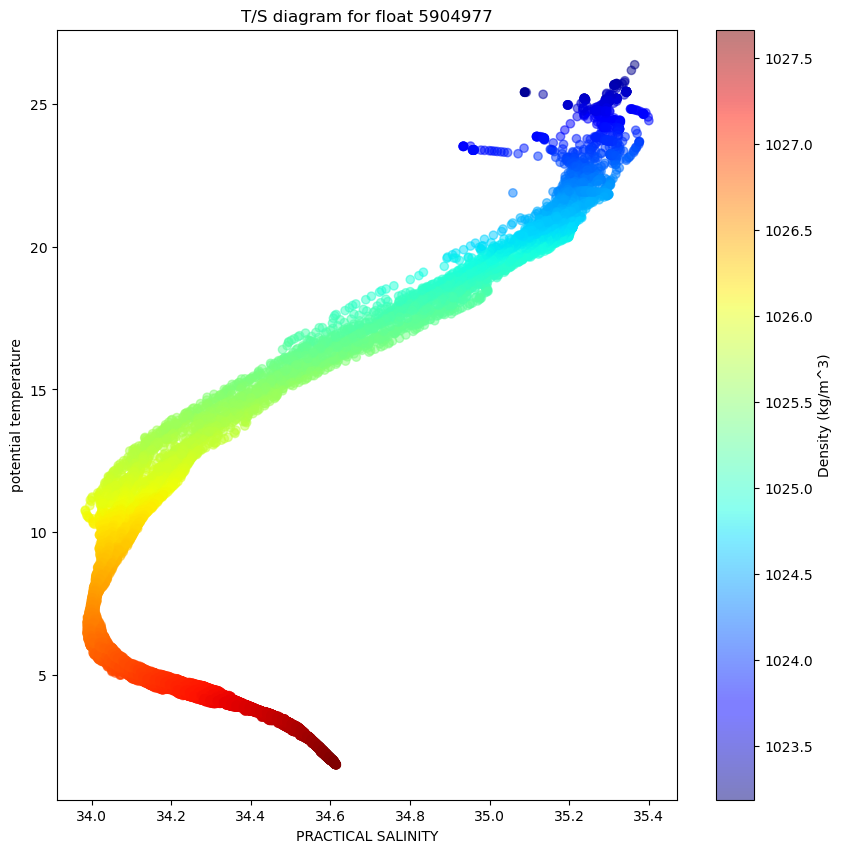

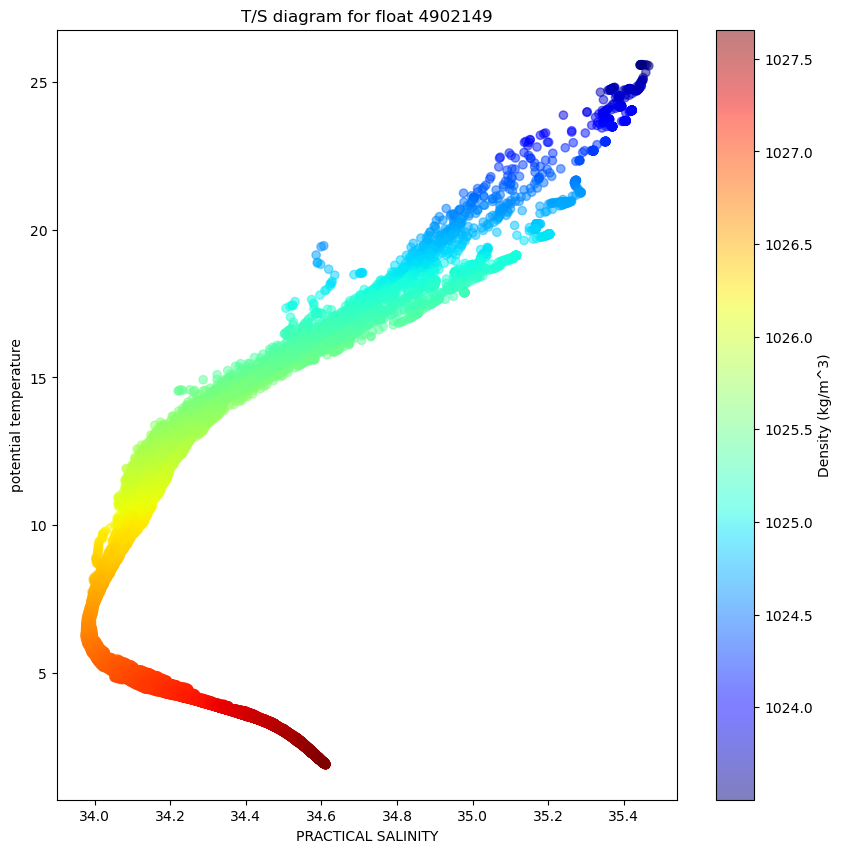

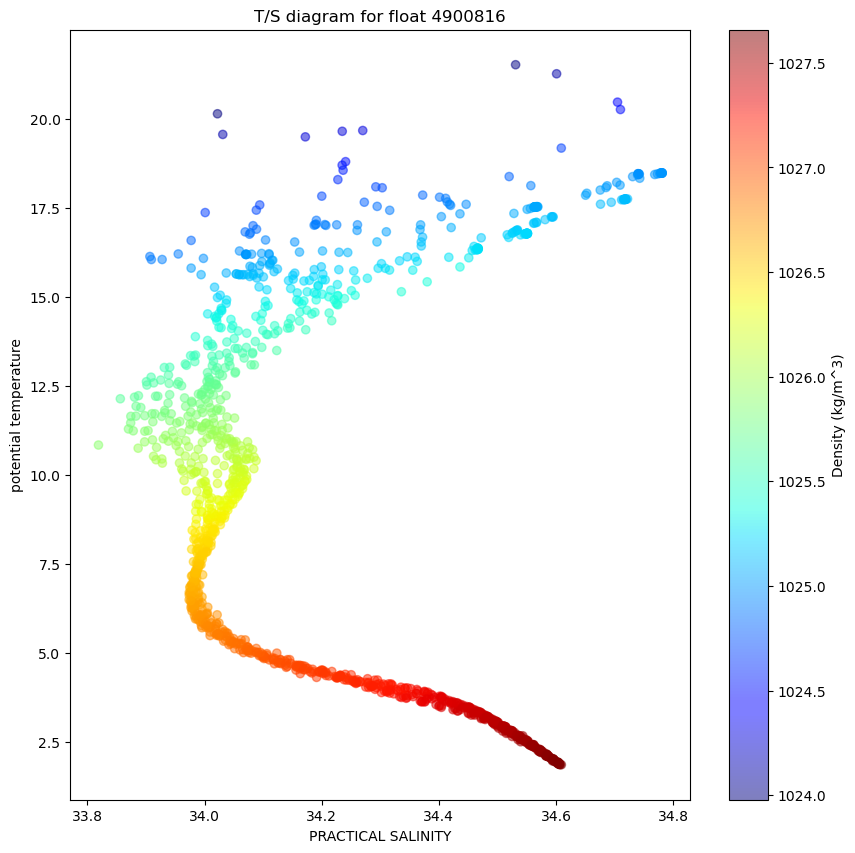

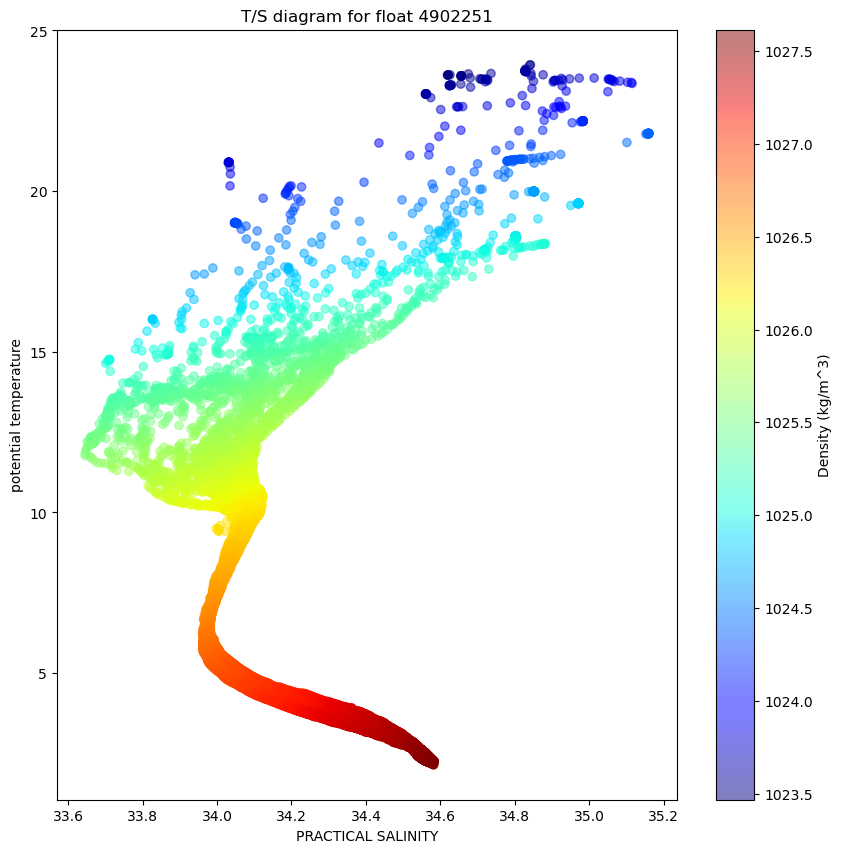

In [4]:
#Now the color bar represents densities! But this data EXcludes NAN's and gets more specific on densities...

import seawater as sw
import matplotlib.pyplot as plt

sliced_data_dict = {}
a_values = [5903608, 5904128, 5904977, 4902149, 4900816, 4902251]
for a in a_values:
    apDS = argo_loader.float(a).load().data
    data1 = apDS.argo.point2profile()
    data2 = data1.set_xindex("TIME")
    sliced_data = data2.sel(TIME=slice('2017-01-01', '2017-12-31'))
    sliced_data_dict[a] = sliced_data

    prof = sliced_data_dict[a]

    temp = prof.TEMP.values.flatten()
    psal = prof.PSAL.values.flatten()
    pres = prof.PRES.values.flatten()

    ptmp = sw.ptmp(psal, temp, pres, pr=0)

    t_bins = np.linspace(2, 25, 200)
    s_bins = np.linspace(35, 37.25, 200)

    pden = sw.dens0(psal, temp)

    valid_indices = ~np.isnan(pden)
    pden_clean = pden[valid_indices]
    psal_clean = psal[valid_indices]
    temp_clean = temp[valid_indices]
    ptmp_clean = ptmp[valid_indices]

    fig, ax = plt.subplots(figsize=(10, 10))
    
    # Directly visualize density using a color map
    sc = ax.scatter(psal_clean, ptmp_clean, c=pden_clean, alpha=0.5, cmap="jet", vmin=pden_clean.min(), vmax=pden_clean.max())
    
    ax.set_title(f"T/S diagram for float {prof.PLATFORM_NUMBER[0].astype(str).values}")
    ax.set_ylabel("potential temperature")
    ax.set_xlabel(f"{prof.PSAL.long_name}")
    fig.colorbar(sc, label="Density (kg/m^3)")

# Display the plot
plt.show()

## T/S Diagrams of EM-APEX Floats:

For all EM-APEX floats who are of the SMILE experiment, in 2017, with salinity greater than or equal to 33. This is plotting all the floats in all three regions of EM-APEX floats.

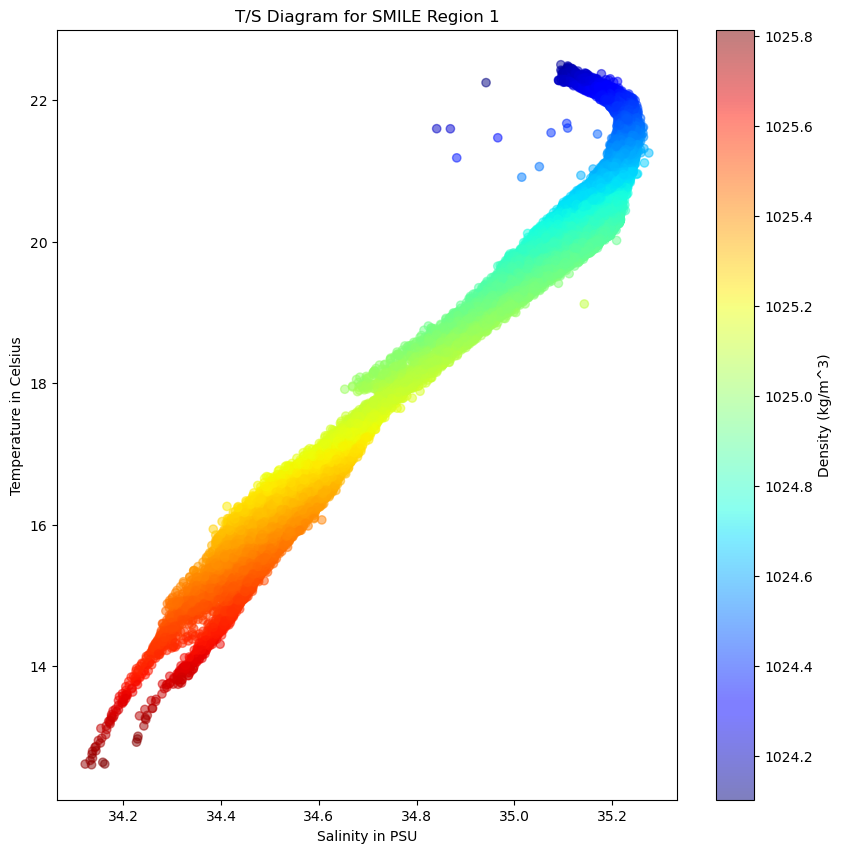

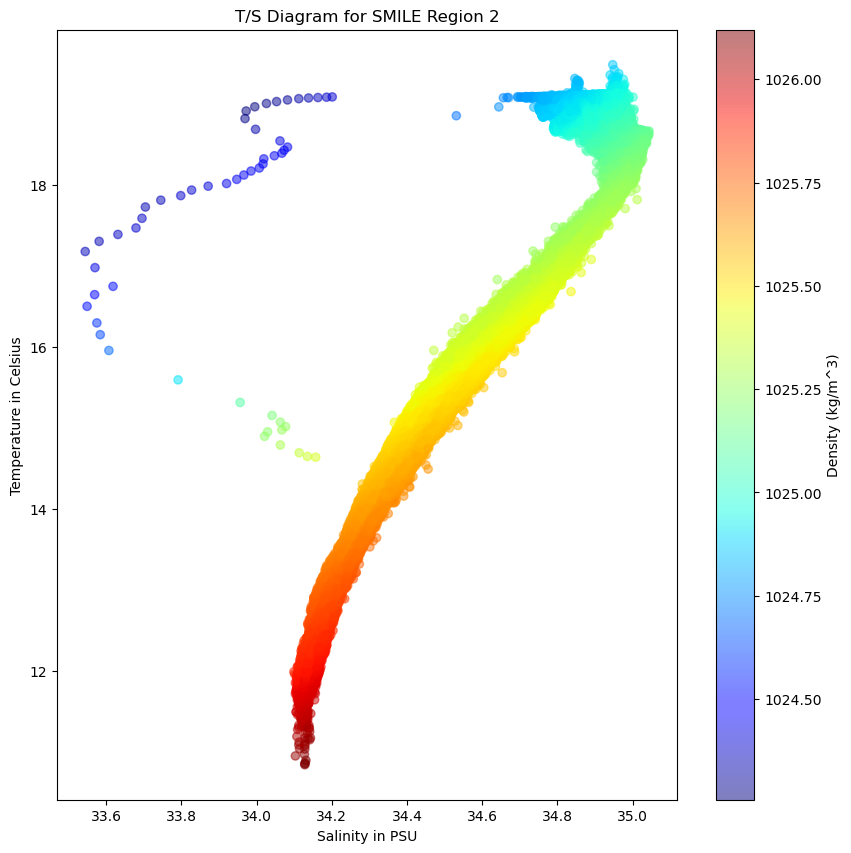

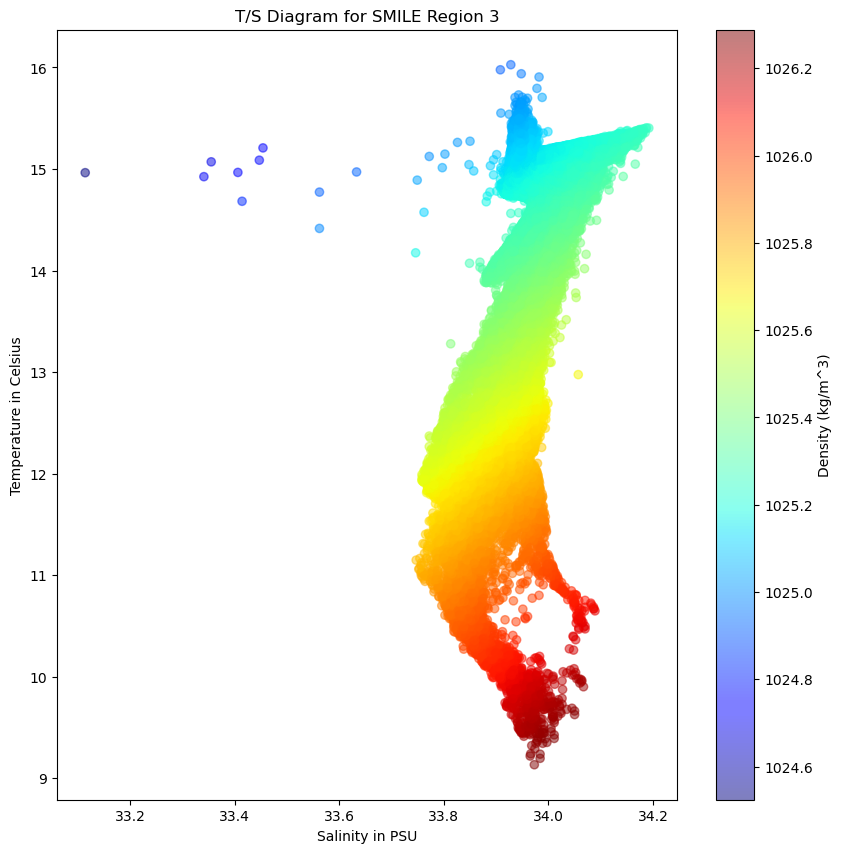

In [5]:
import seawater as sw
import numpy as np

for a in [EM_SMILE_dfR1, EM_SMILE_dfR2, EM_SMILE_dfR3]:

    prof = a
    
    temp = prof['T'].values.flatten()
    psal = prof['S'].values.flatten()
    pres = prof['P'].values.flatten()
    
    ptmp = sw.ptmp(psal, temp, pres, pr=0)
    
    t_bins = np.linspace(2, 25, 200)
    s_bins = np.linspace(35, 37.25, 200)
    
    pden = sw.dens0(psal, temp)
    
    valid_indices = ~np.isnan(pden)
    pden_clean = pden[valid_indices]
    psal_clean = psal[valid_indices]
    temp_clean = temp[valid_indices]
    ptmp_clean = ptmp[valid_indices]
    
    fig, ax = plt.subplots(figsize=(10, 10))
        
    # Directly visualize density using a color map
    sc = ax.scatter(psal_clean, ptmp_clean, c=pden_clean, alpha=0.5, cmap="jet", vmin=pden_clean.min(), vmax=pden_clean.max())

    #This is an if then statement to title each graph properly?
    if a is EM_SMILE_dfR1:
        b = "SMILE Region 1"
    elif a is EM_SMILE_dfR2:
        b = "SMILE Region 2"
    else:
        b = "SMILE Region 3"
        
    ax.set_title(f"T/S Diagram for {b}")
    ax.set_ylabel("Temperature in Celsius")
    ax.set_xlabel("Salinity in PSU")
    fig.colorbar(sc, label="Density (kg/m^3)")
    
    # Display the plot
    plt.show()

## Additional Alterations

### Limiting T/S Diagrams Based on Depth

Before the Argo floats were all being graphed with full depth of profiling to 2000m, but EM-APEX floats were only down to 250m. For a more accurate comparison, I limited the T/S diagrams of the Argo floats to 250m which was closer to that of the EM-APEX floats. These were also limited by month!

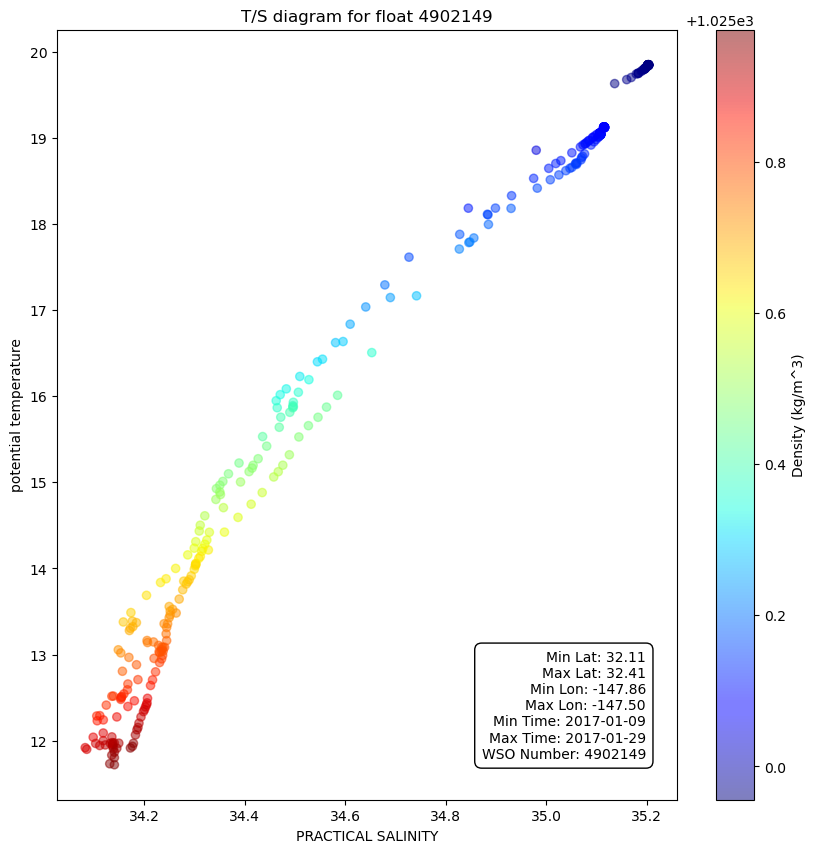

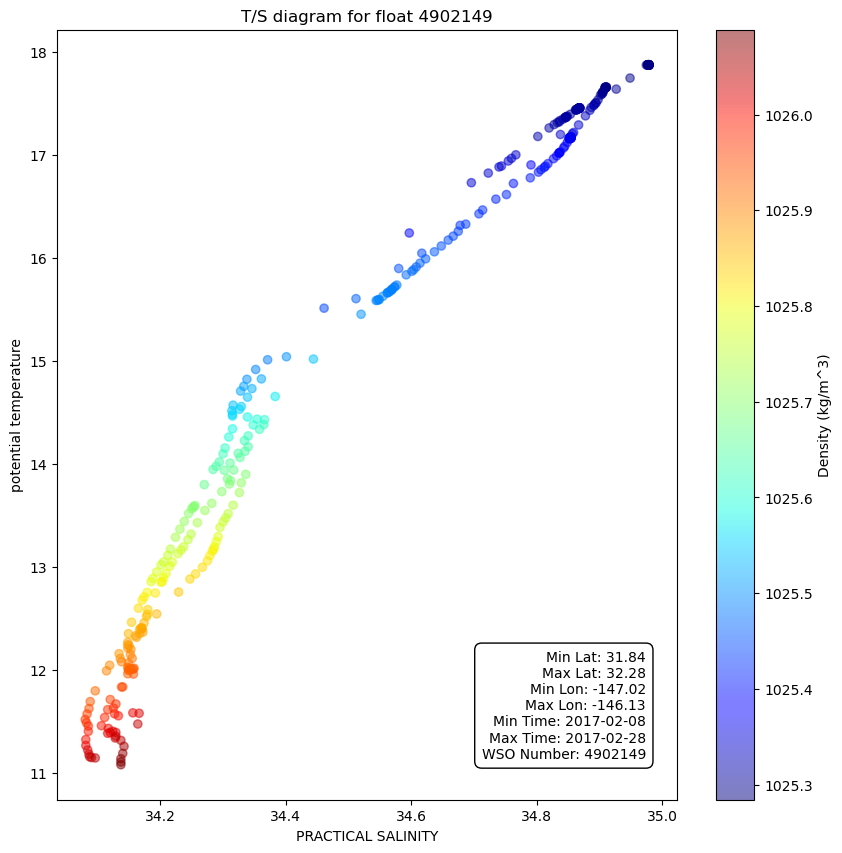

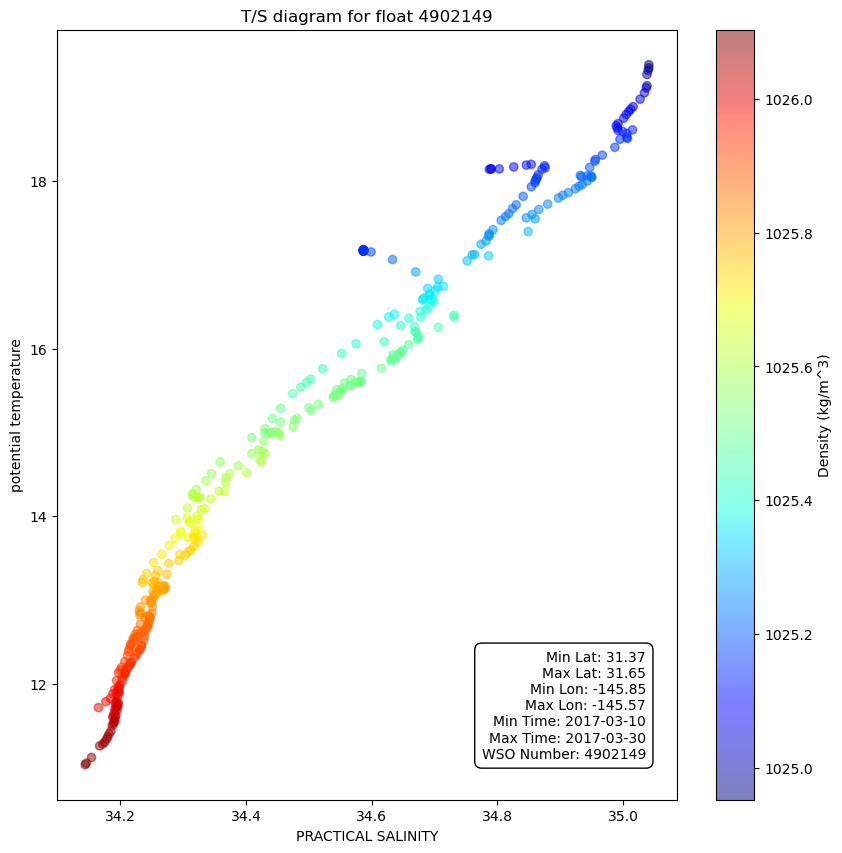

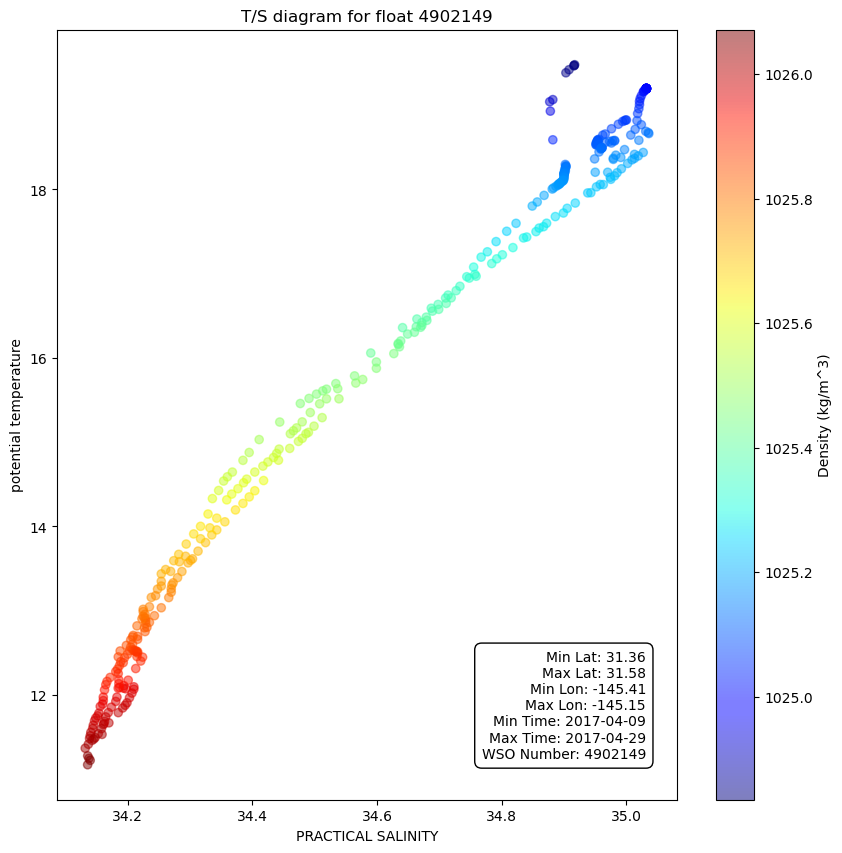

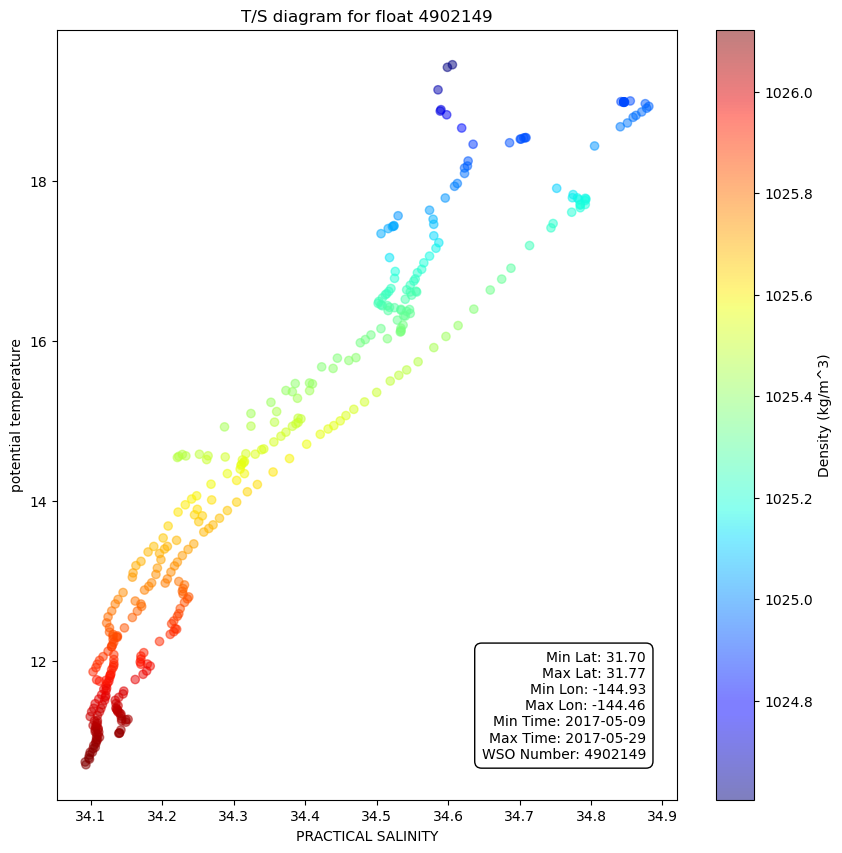

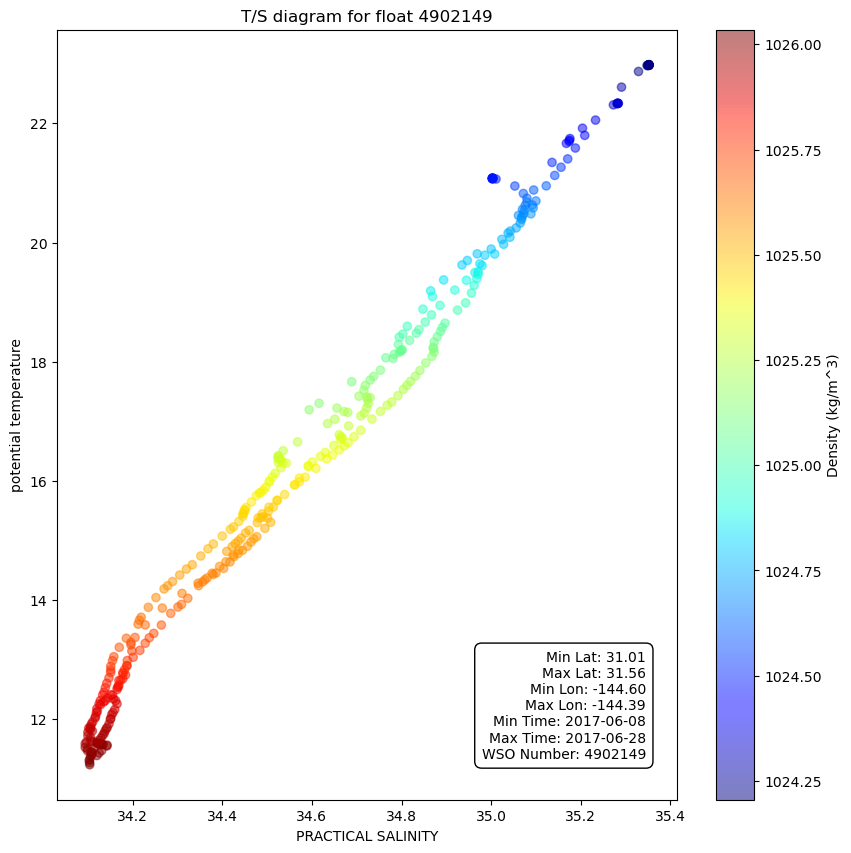

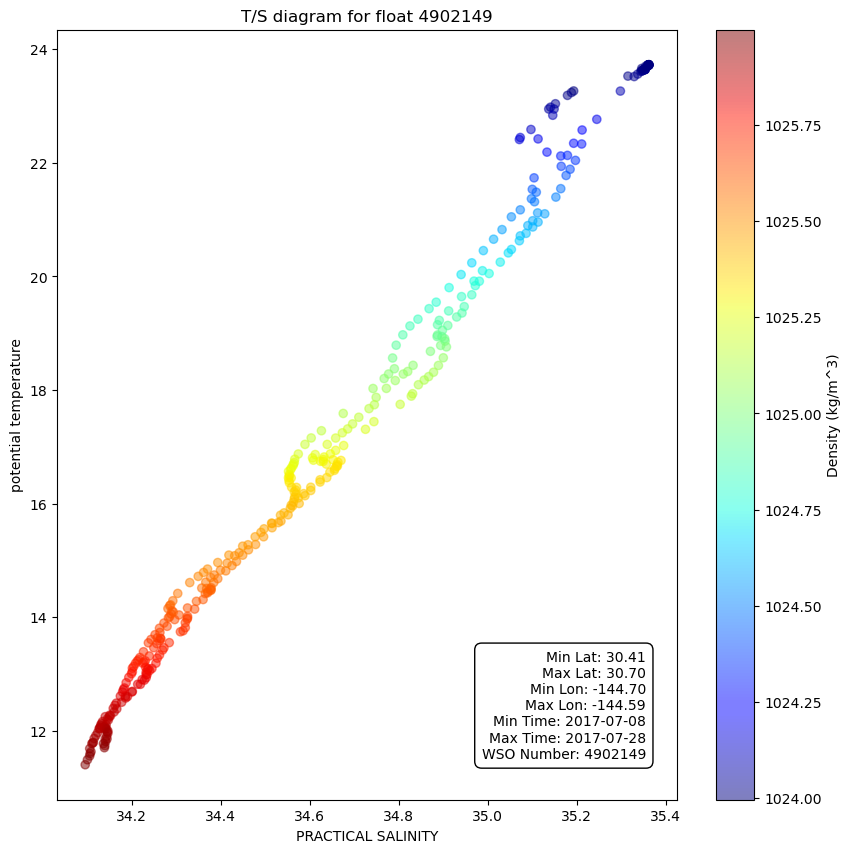

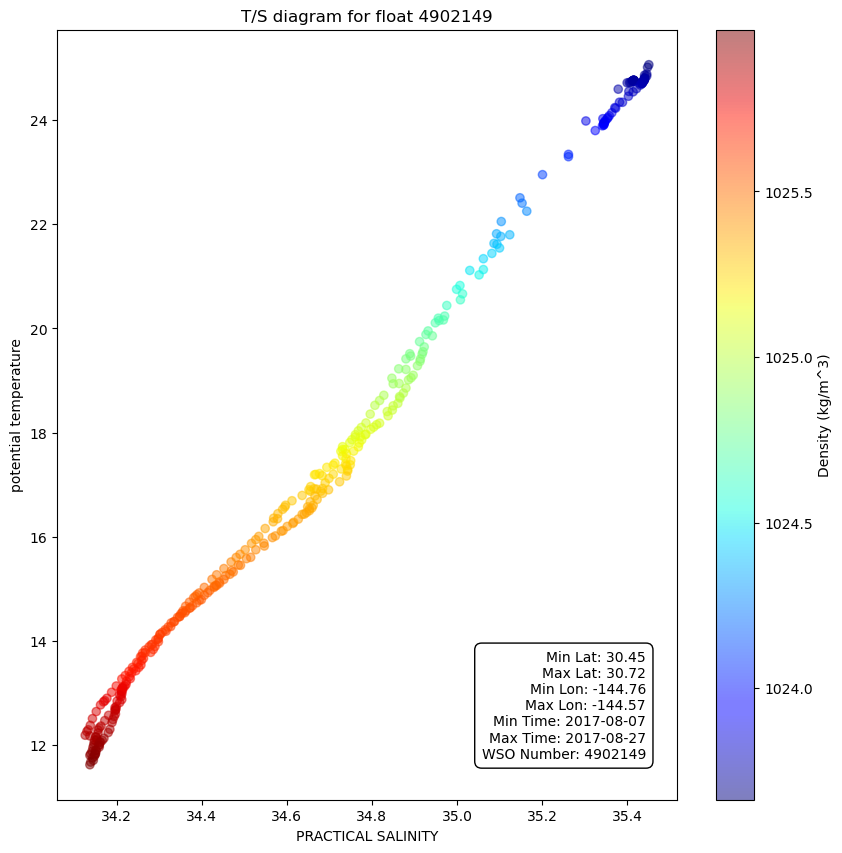

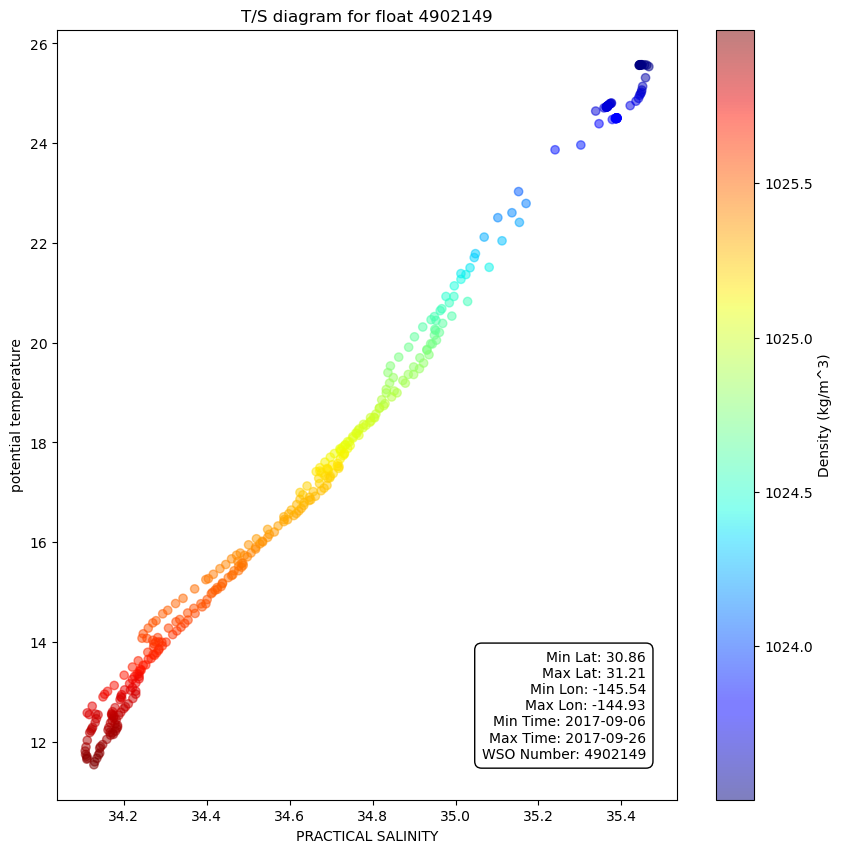

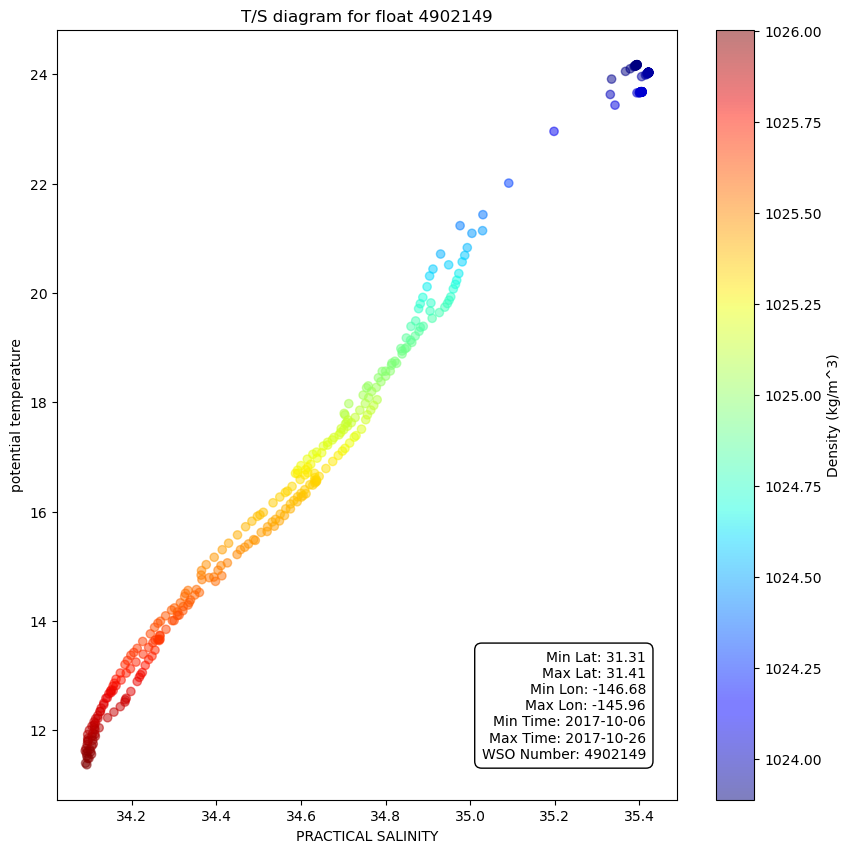

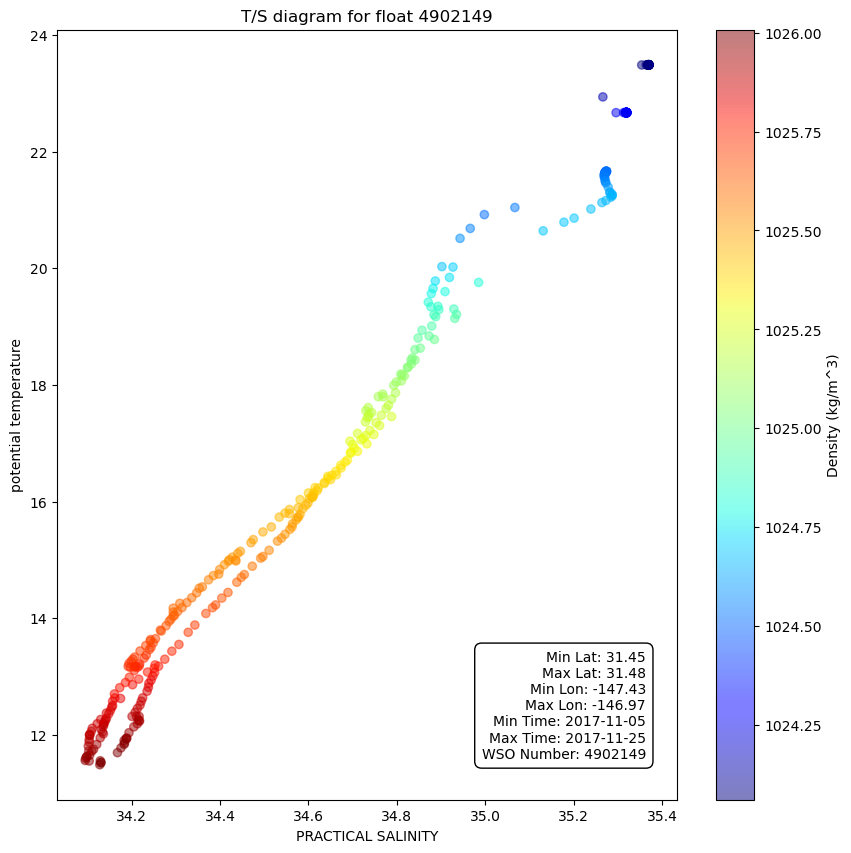

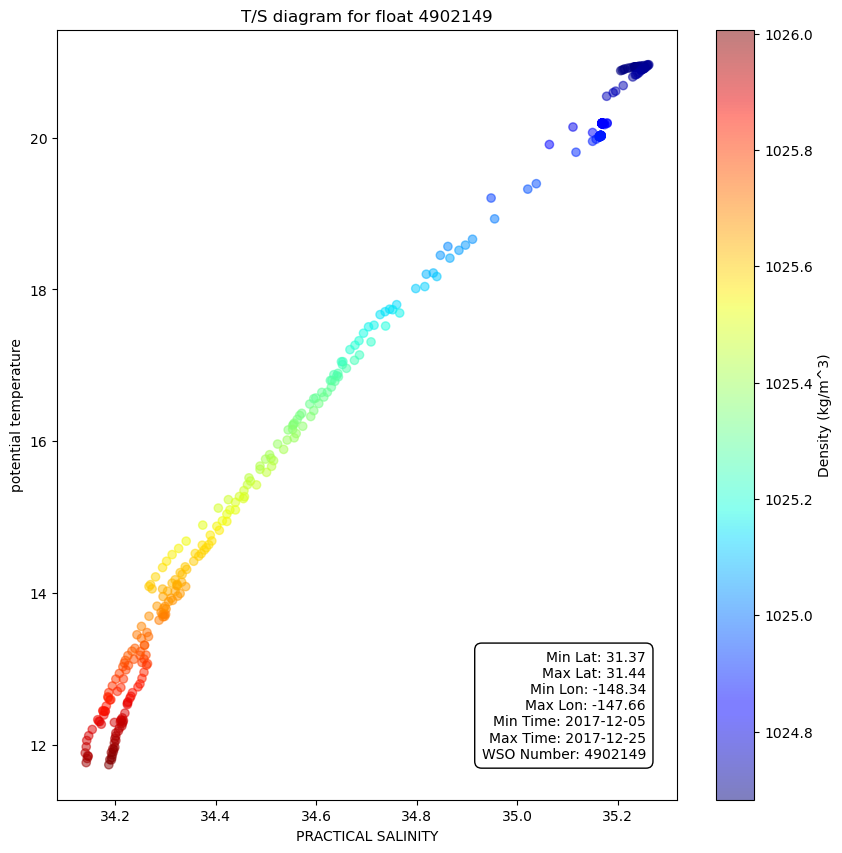

In [6]:
#Making it so that we are JUST graphing from a given depth and up! In this case, for depths greater less than or equal to 250 dbar!

import seawater as sw
import matplotlib.pyplot as plt

date_ranges = {
    4902149: [('2017-01-01', '2017-02-01'), ('2017-02-01', '2017-03-01'), ('2017-03-01', '2017-04-01'), ('2017-04-01', '2017-05-01'),
             ('2017-05-01', '2017-06-01'), ('2017-06-01', '2017-07-01'), ('2017-07-01', '2017-08-01'), ('2017-08-01', '2017-09-01'), ('2017-09-01', '2017-10-01'), ('2017-10-01', '2017-11-01'),
             ('2017-11-01', '2017-12-01'), ('2017-12-01', '2017-12-31')],
}

# Initialize the sliced_data_dict as an empty dictionary
sliced_data_dict = {}

# Loop through each WSO Identifier and its date ranges
for wso_identifier, ranges in date_ranges.items():
    # Initialize a list to store data slices for each date range
    sliced_data_list = []
    apDS = argo_loader.float(wso_identifier).load().data
    data1 = apDS.argo.point2profile()
    data2 = data1.set_xindex("TIME")

    # Iterate through the date ranges for the current WSO Identifier
    for date_range in ranges:
        start_date, end_date = date_range
        # Slice data based on the current date range
        sliced_data = data2.sel(TIME=slice(start_date, end_date))
        # Append the sliced data to the list
        sliced_data_list.append(sliced_data)

    # Append the list of sliced data to the dictionary using the WSO Identifier as the key
    sliced_data_dict[wso_identifier] = sliced_data_list

# Now you can access each list of sliced data for each WSO Identifier using the float identifier (WSO Identifier) as the key
for wso_identifier, sliced_data_list in sliced_data_dict.items():
    # Process each list of sliced data for plotting or further analysis
    for sliced_data in sliced_data_list:

        # Extract variables from sliced_data for plotting
        temp = sliced_data.TEMP.values.flatten()
        psal = sliced_data.PSAL.values.flatten()
        pres = sliced_data.PRES.values.flatten()
    
        # Filter data points where pressure is at or less than 250
        valid_indices_pres = pres <= 250
        temp_clean = temp[valid_indices_pres]
        psal_clean = psal[valid_indices_pres]
        pres_clean = pres[valid_indices_pres]
    
        ptmp = sw.ptmp(psal_clean, temp_clean, pres_clean, pr=0)
    
        t_bins = np.linspace(2, 25, 200)
        s_bins = np.linspace(35, 37.25, 200)
    
        pden_clean = sw.dens0(psal_clean, ptmp)  # Calculate pden using the filtered arrays
    
        fig, ax = plt.subplots(figsize=(10, 10))
    
        # Directly visualize density using a color map
        sc = ax.scatter(psal_clean, ptmp, c=pden_clean, alpha=0.5, cmap="jet", vmin=pden_clean.min(), vmax=pden_clean.max())

        ax.set_title(f"T/S diagram for float {wso_identifier}")
        ax.set_ylabel("potential temperature")
        ax.set_xlabel(f"{sliced_data.PSAL.long_name}")
        fig.colorbar(sc, label="Density (kg/m^3)")

        max_lat = sliced_data.LATITUDE.max().values
        min_lat = sliced_data.LATITUDE.min().values
        max_lon = sliced_data.LONGITUDE.max().values
        min_lon = sliced_data.LONGITUDE.min().values
        min_time = pd.to_datetime(sliced_data.TIME.min().values).strftime('%Y-%m-%d')
        max_time = pd.to_datetime(sliced_data.TIME.max().values).strftime('%Y-%m-%d')
        wso_identifier = sliced_data.PLATFORM_NUMBER.min().values
    
        text_plot = f"Min Lat: {min_lat:.2f}\nMax Lat: {max_lat:.2f}\nMin Lon: {min_lon:.2f}\nMax Lon: {max_lon:.2f}\nMin Time: {min_time}\nMax Time: {max_time}\nWSO Number: {wso_identifier}"
        ax.text(0.95, 0.05, text_plot, transform=ax.transAxes, ha='right', va='bottom', fontsize=10,
               bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.5'))

plt.show()

### Limiting T/S Argo Diagrams to specific Months for Seasonal Comparisons Specific to Region 1&2

Region #1 Focus on Float 5903608

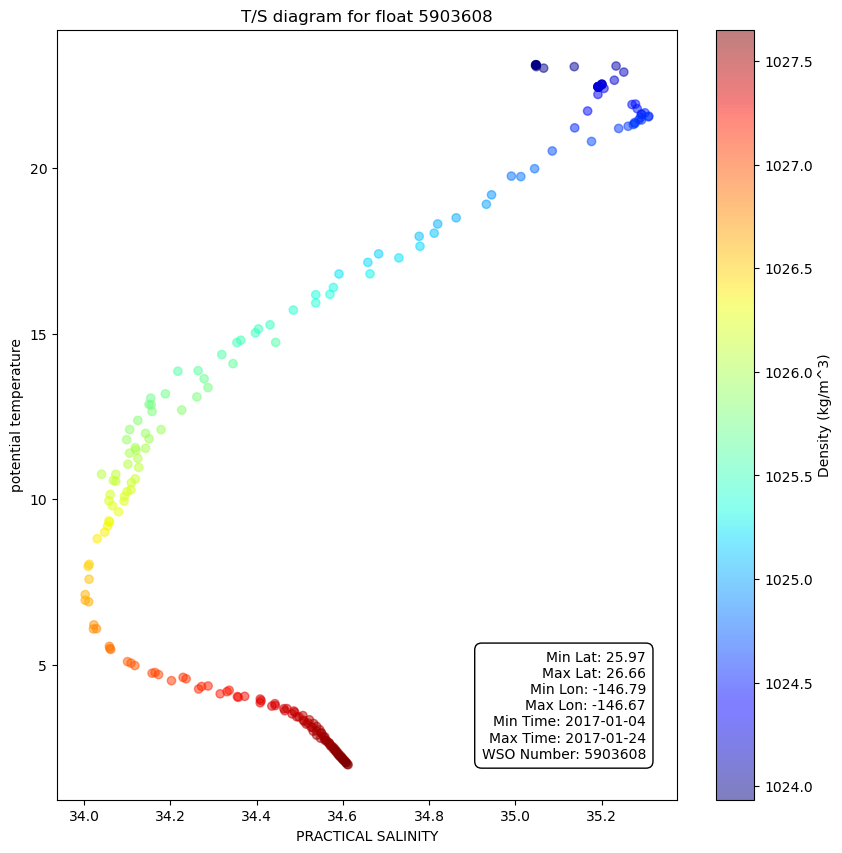

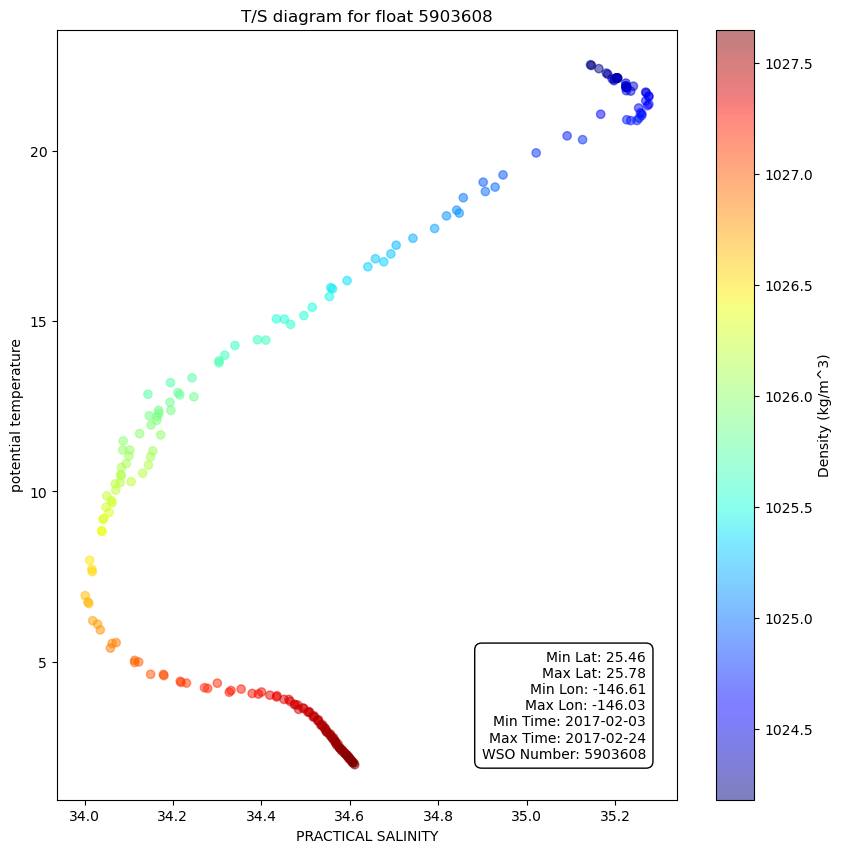

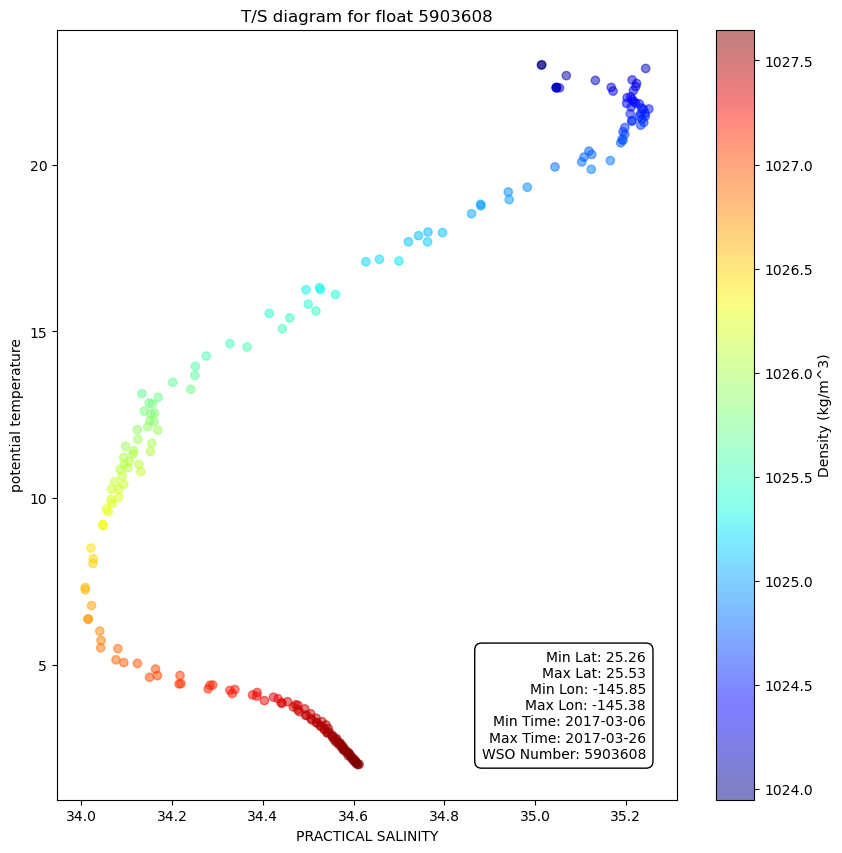

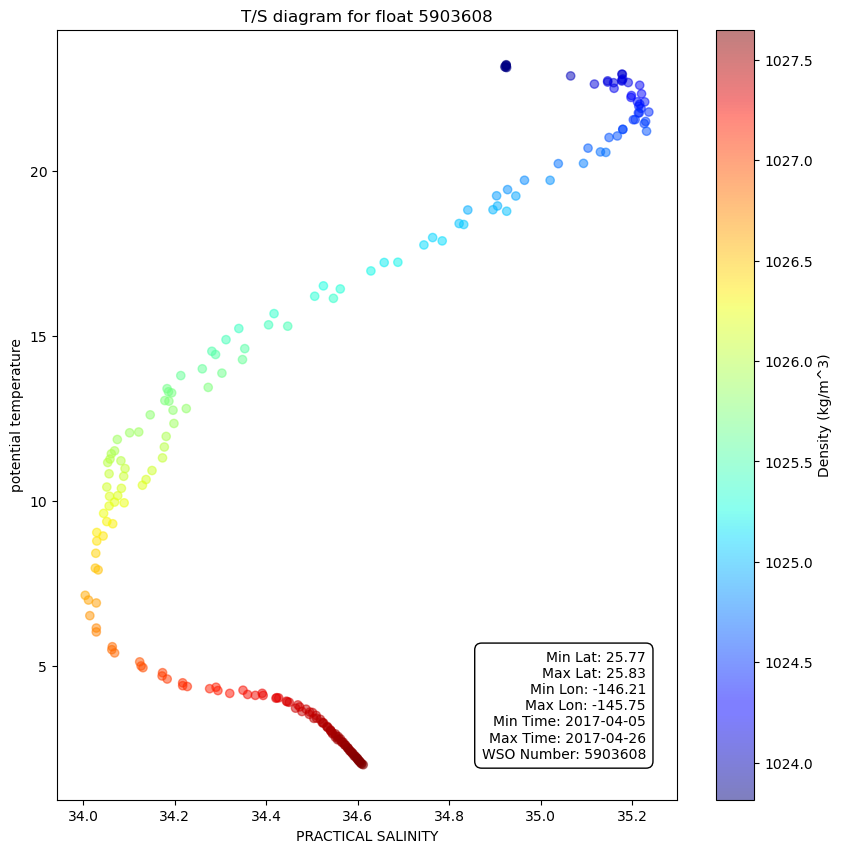

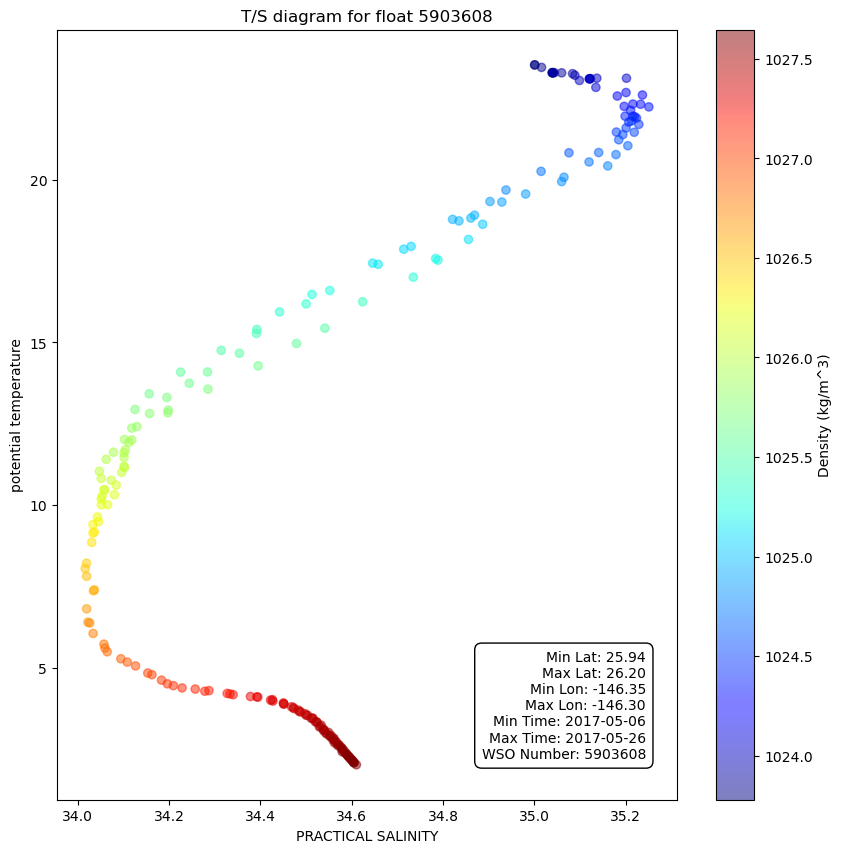

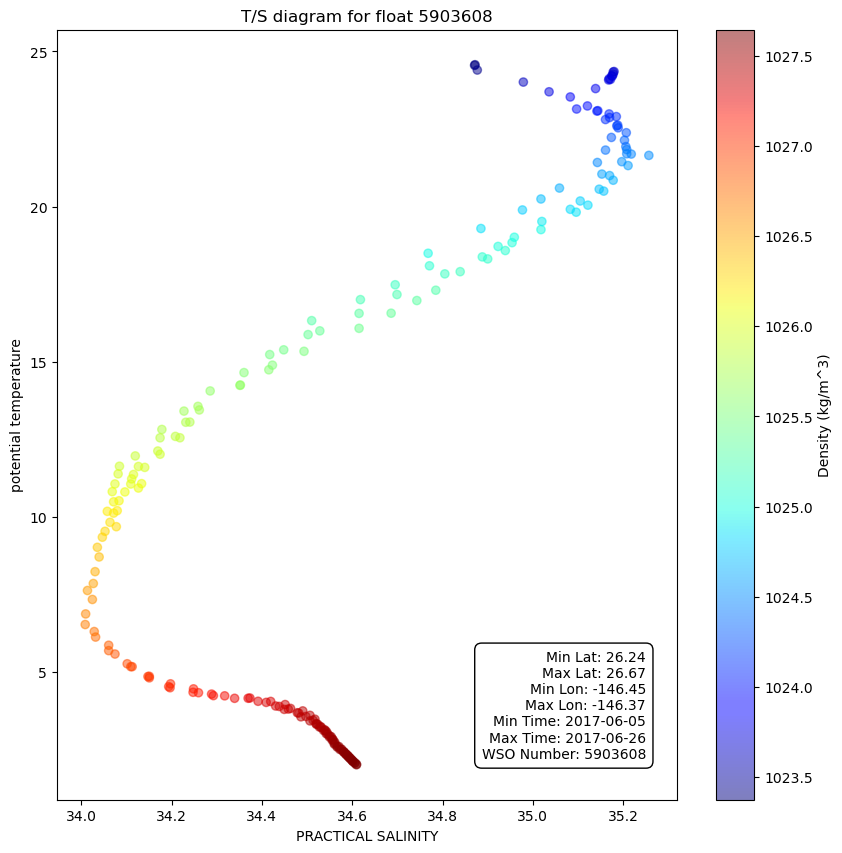

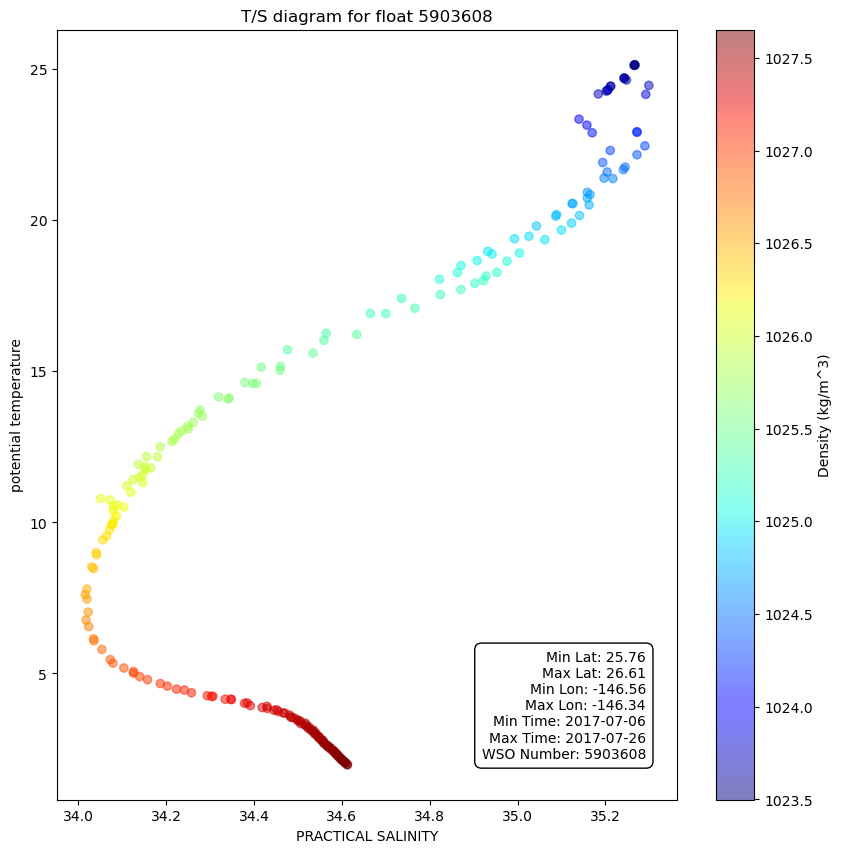

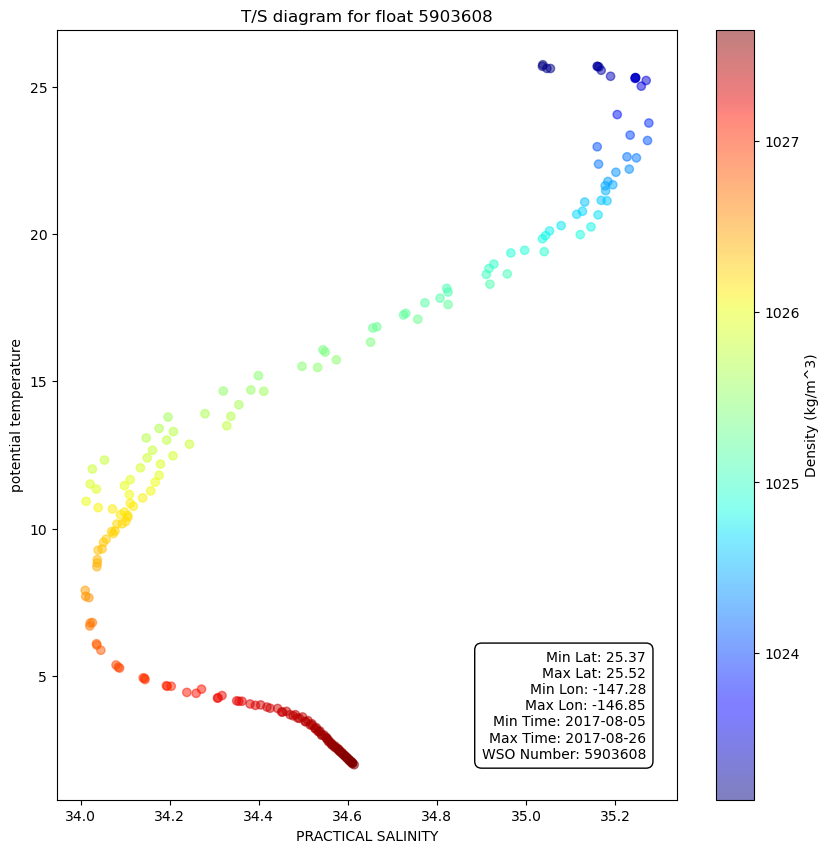

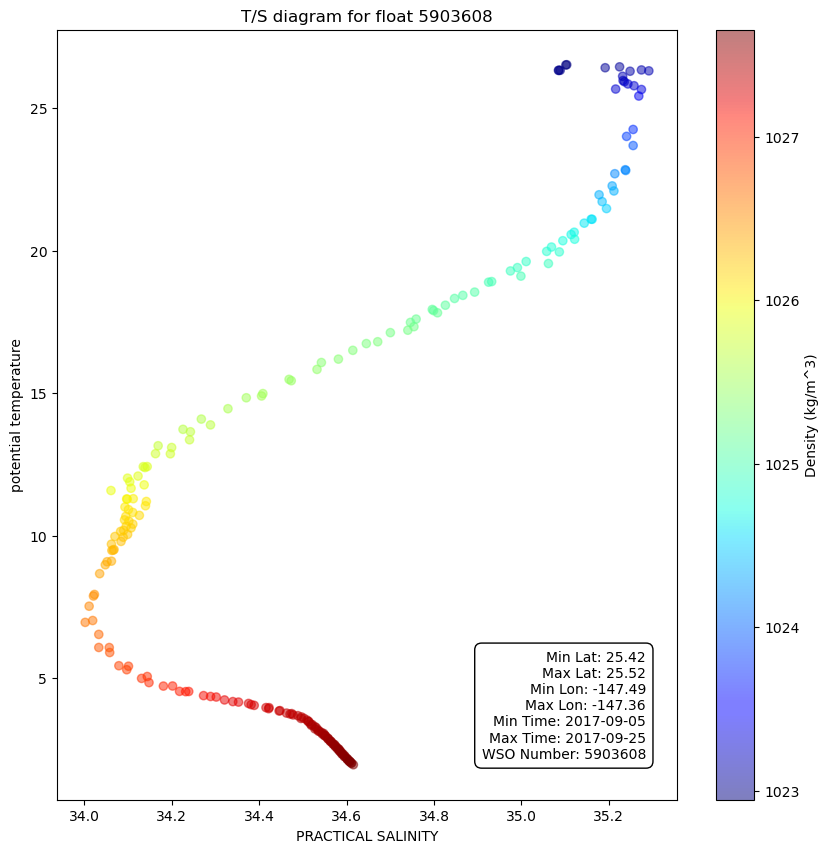

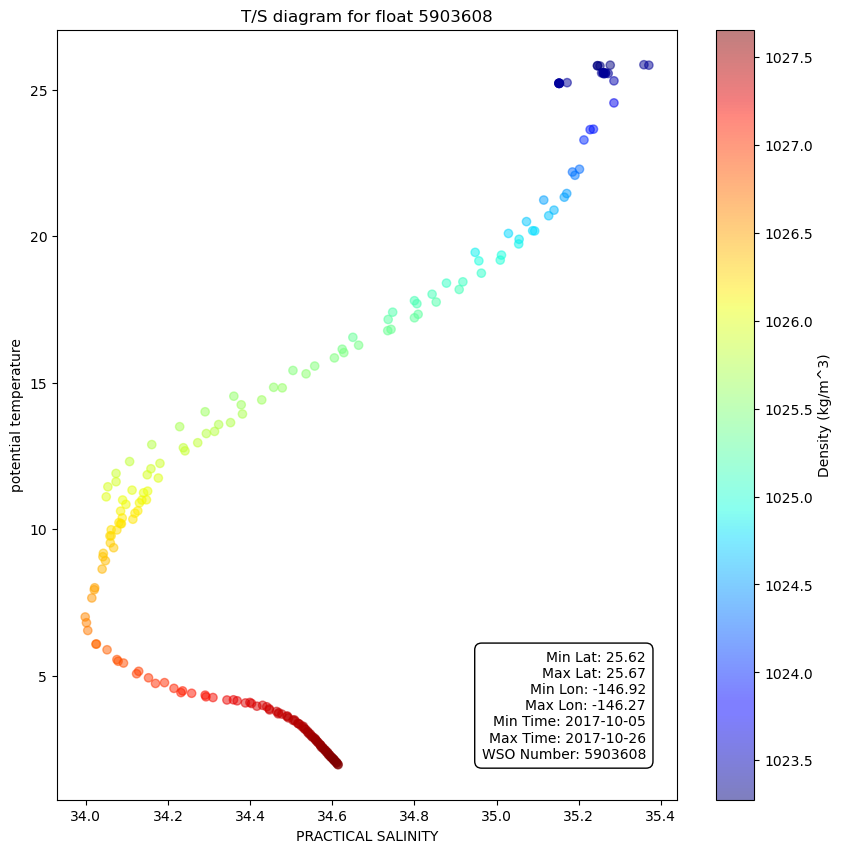

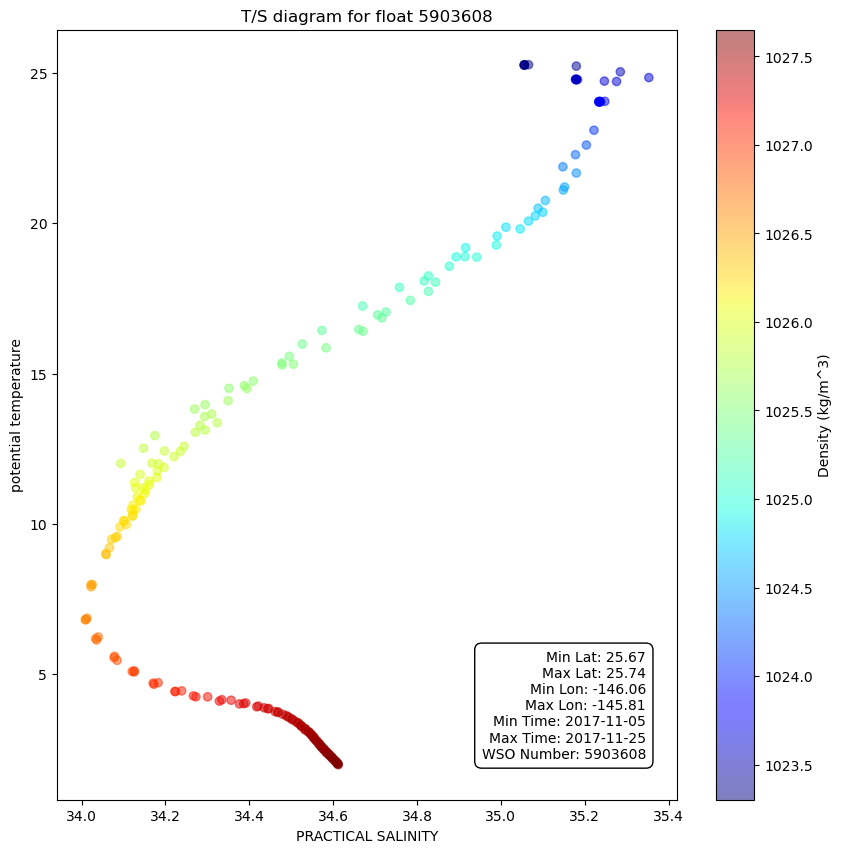

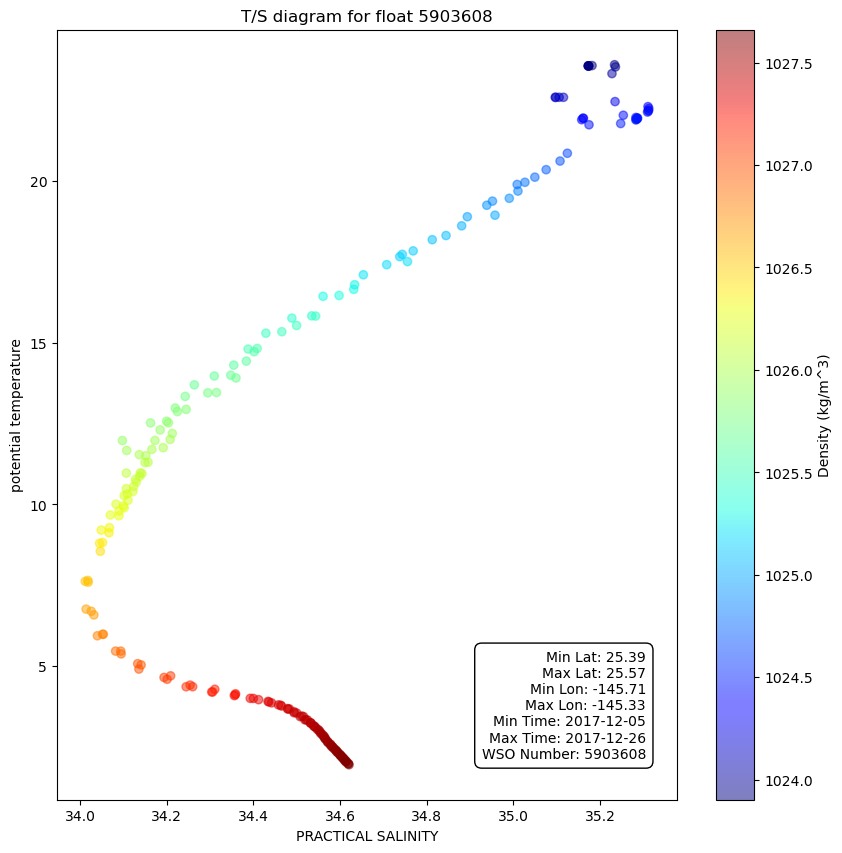

In [7]:
import seawater as sw
import matplotlib.pyplot as plt

date_ranges = {
    5903608: [('2017-01-01', '2017-02-01'), ('2017-02-01', '2017-03-01'), ('2017-03-01', '2017-04-01'), ('2017-04-01', '2017-05-01'),
             ('2017-05-01', '2017-06-01'), ('2017-06-01', '2017-07-01'), ('2017-07-01', '2017-08-01'), ('2017-08-01', '2017-09-01'), ('2017-09-01', '2017-10-01'), ('2017-10-01', '2017-11-01'),
             ('2017-11-01', '2017-12-01'), ('2017-12-01', '2017-12-31')], 
    # Other WSO Identifiers and their date ranges...
}

# Initialize the sliced_data_dict as an empty dictionary
sliced_data_dict = {}

# Loop through each WSO Identifier and its date ranges
for wso_identifier, ranges in date_ranges.items():
    # Initialize a list to store data slices for each date range
    sliced_data_list = []
    apDS = argo_loader.float(wso_identifier).load().data
    data1 = apDS.argo.point2profile()
    data2 = data1.set_xindex("TIME")

    # Iterate through the date ranges for the current WSO Identifier
    for date_range in ranges:
        start_date, end_date = date_range
        # Slice data based on the current date range
        sliced_data = data2.sel(TIME=slice(start_date, end_date))
        # Append the sliced data to the list
        sliced_data_list.append(sliced_data)

    # Append the list of sliced data to the dictionary using the WSO Identifier as the key
    sliced_data_dict[wso_identifier] = sliced_data_list

# Now you can access each list of sliced data for each WSO Identifier using the float identifier (WSO Identifier) as the key
for wso_identifier, sliced_data_list in sliced_data_dict.items():
    # Process each list of sliced data for plotting or further analysis
    for sliced_data in sliced_data_list:
        # Extract variables from sliced_data for plotting
        temp = sliced_data.TEMP.values.flatten()
        psal = sliced_data.PSAL.values.flatten()
        pres = sliced_data.PRES.values.flatten()

        ptmp = sw.ptmp(psal, temp, pres, pr=0)

        t_bins = np.linspace(2, 25, 200)
        s_bins = np.linspace(35, 37.25, 200)

        pden = sw.dens0(psal, temp)

        valid_indices = ~np.isnan(pden)
        pden_clean = pden[valid_indices]
        psal_clean = psal[valid_indices]
        temp_clean = temp[valid_indices]
        ptmp_clean = ptmp[valid_indices]

        fig, ax = plt.subplots(figsize=(10, 10))

        # Directly visualize density using a color map
        sc = ax.scatter(psal_clean, ptmp_clean, c=pden_clean, alpha=0.5, cmap="jet", vmin=pden_clean.min(), vmax=pden_clean.max())

        ax.set_title(f"T/S diagram for float {wso_identifier}")
        ax.set_ylabel("potential temperature")
        ax.set_xlabel(f"{sliced_data.PSAL.long_name}")
        fig.colorbar(sc, label="Density (kg/m^3)")

        max_lat = sliced_data.LATITUDE.max().values
        min_lat = sliced_data.LATITUDE.min().values
        max_lon = sliced_data.LONGITUDE.max().values
        min_lon = sliced_data.LONGITUDE.min().values
        min_time = pd.to_datetime(sliced_data.TIME.min().values).strftime('%Y-%m-%d')
        max_time = pd.to_datetime(sliced_data.TIME.max().values).strftime('%Y-%m-%d')
        wso_identifier = sliced_data.PLATFORM_NUMBER.min().values
    
        text_plot = f"Min Lat: {min_lat:.2f}\nMax Lat: {max_lat:.2f}\nMin Lon: {min_lon:.2f}\nMax Lon: {max_lon:.2f}\nMin Time: {min_time}\nMax Time: {max_time}\nWSO Number: {wso_identifier}"
        ax.text(0.95, 0.05, text_plot, transform=ax.transAxes, ha='right', va='bottom', fontsize=10,
               bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.5'))

plt.show()

Region #2 Focus on Float 4902149

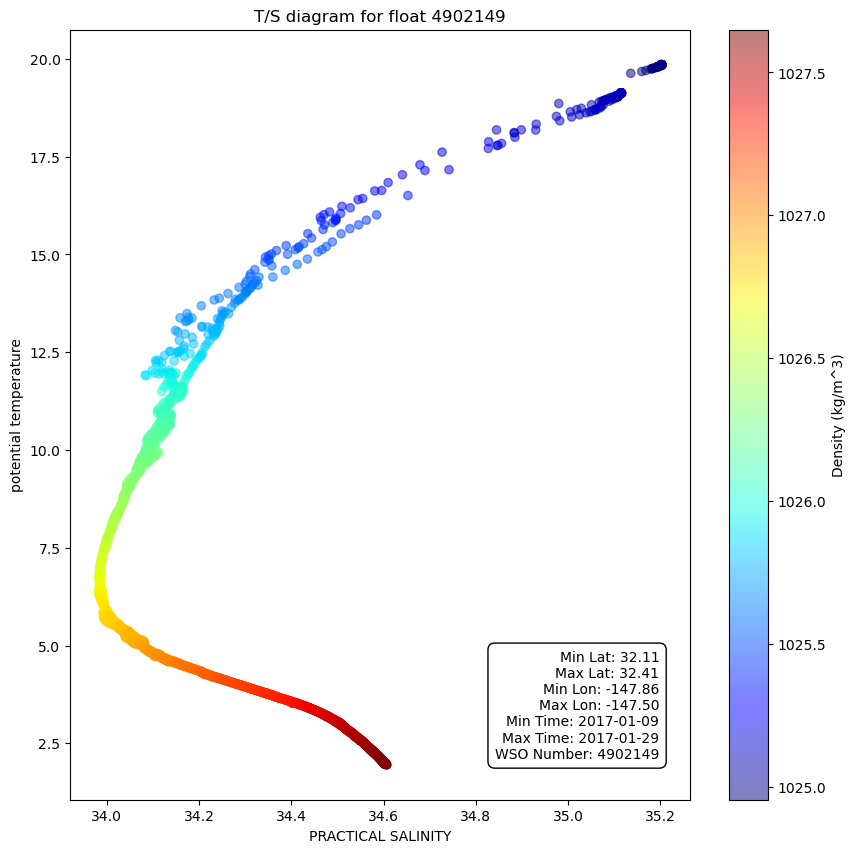

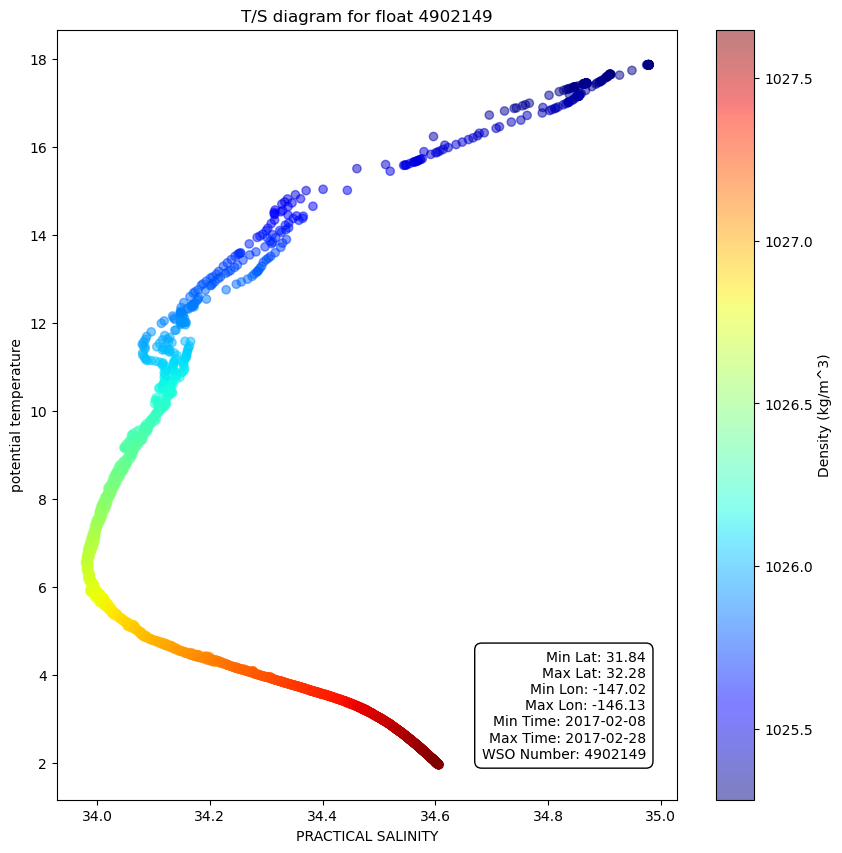

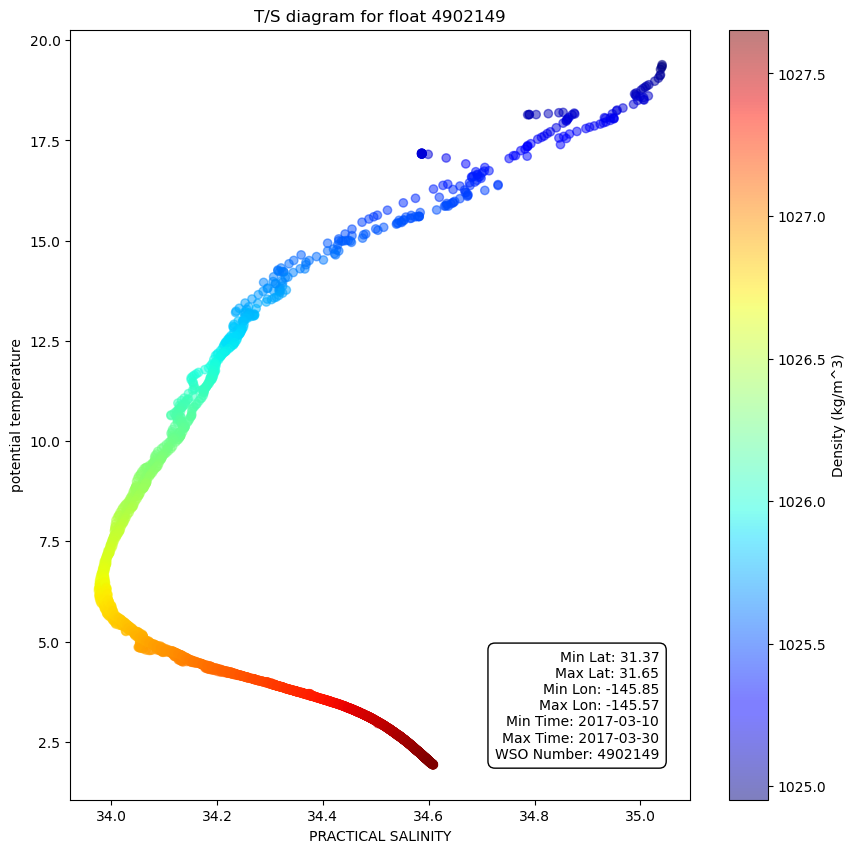

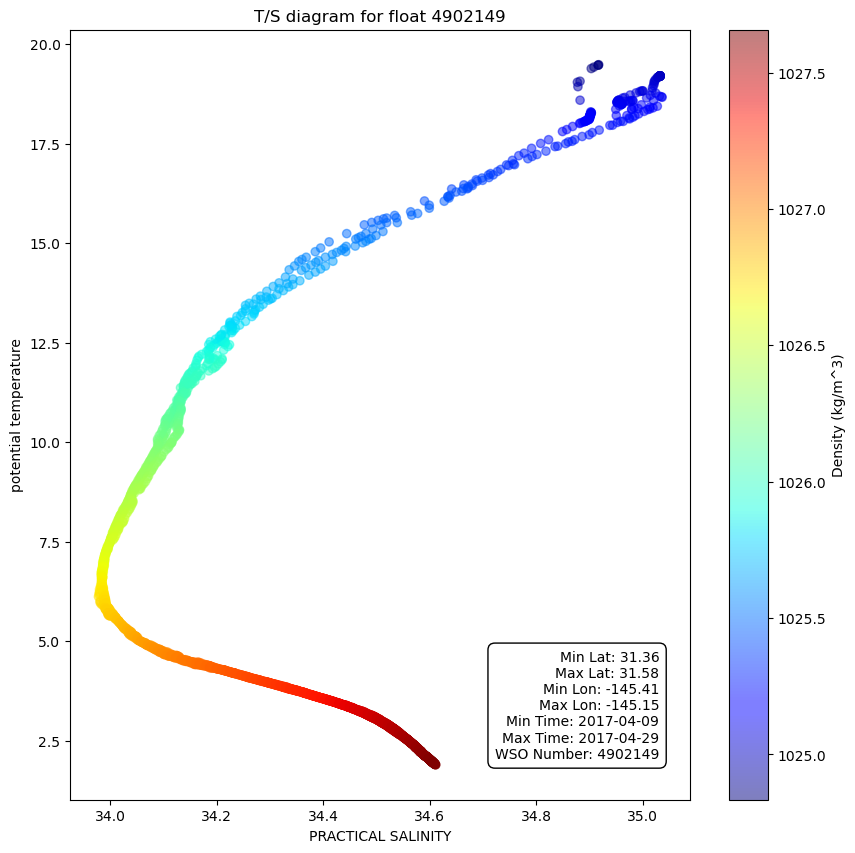

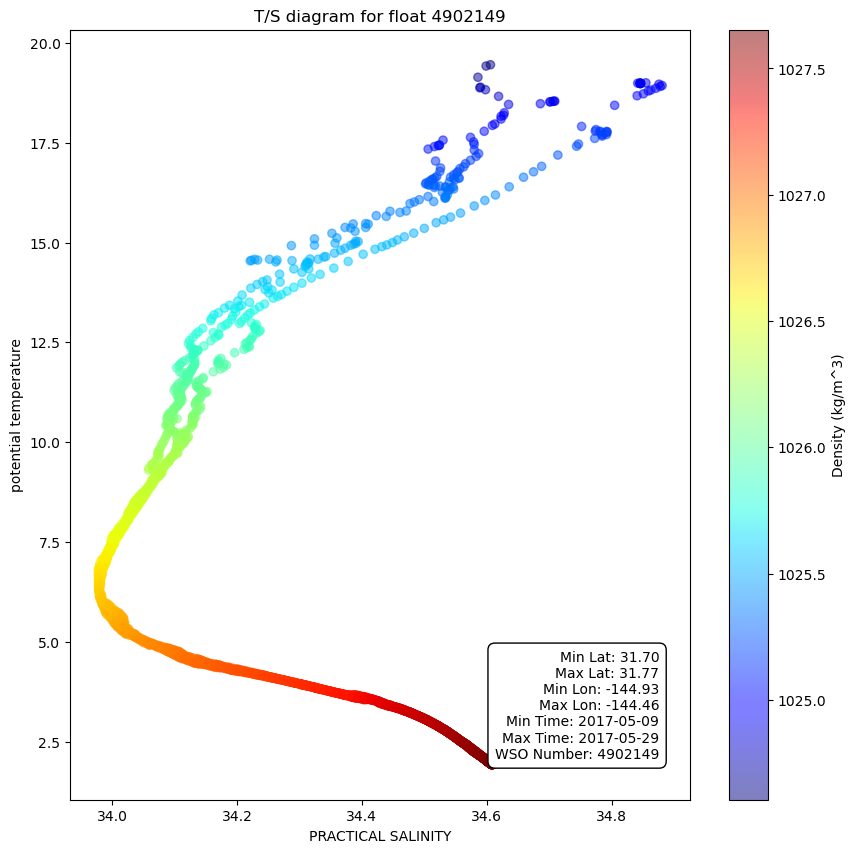

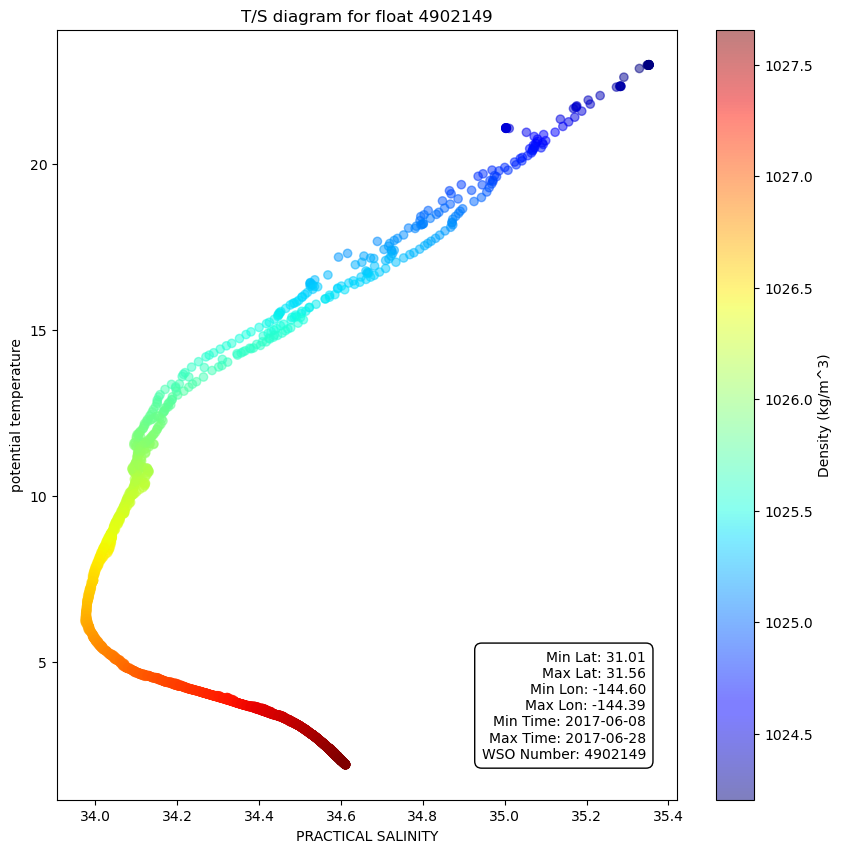

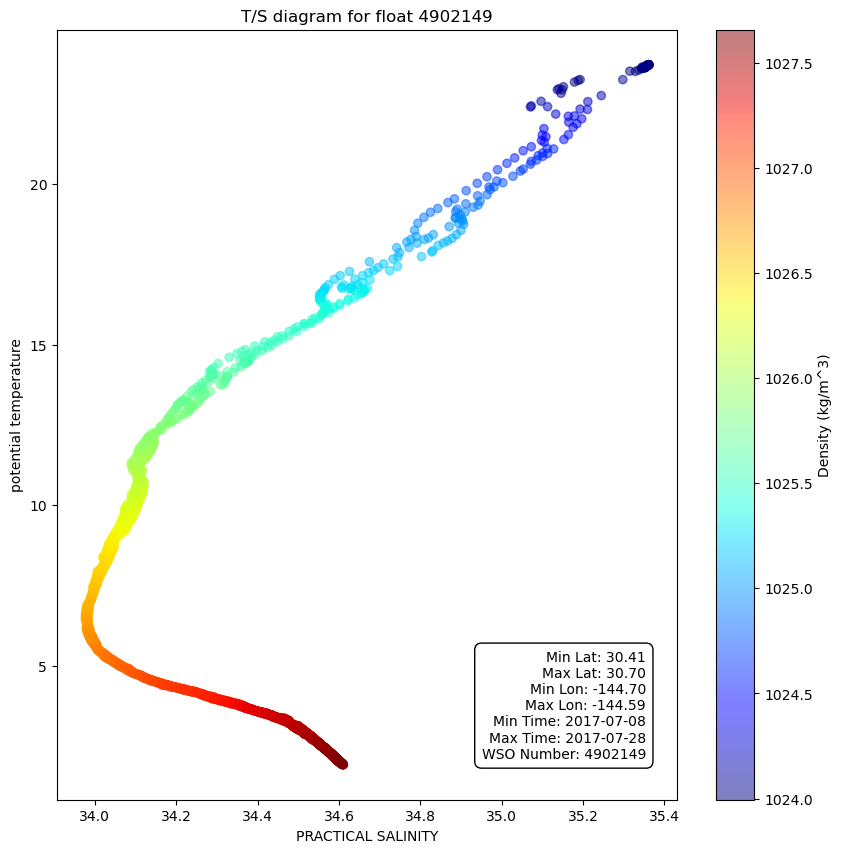

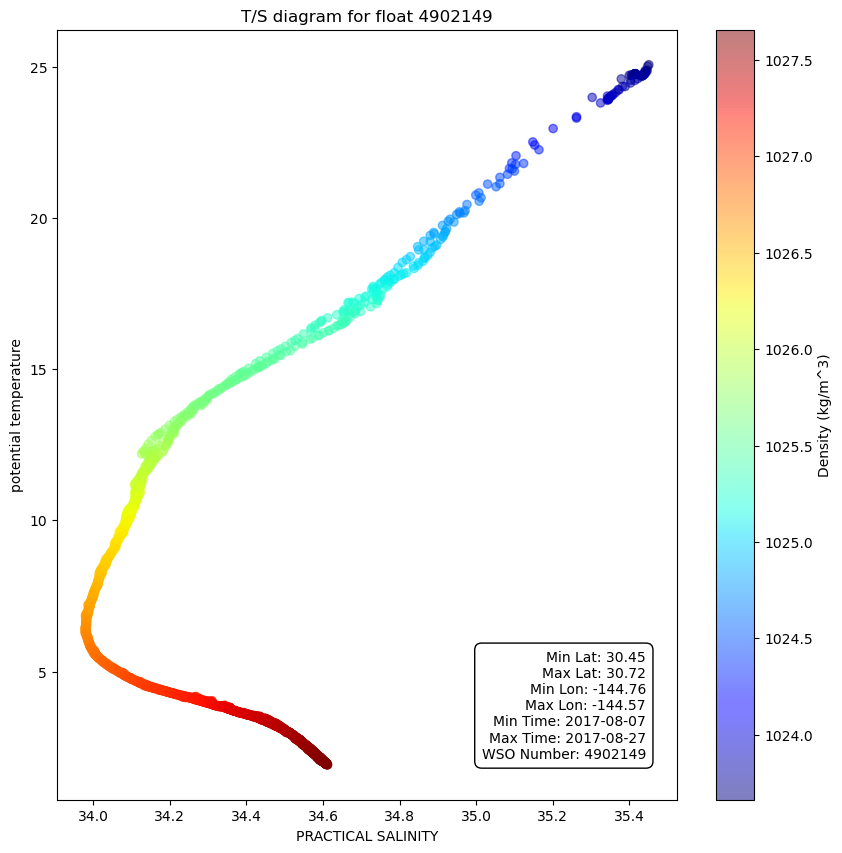

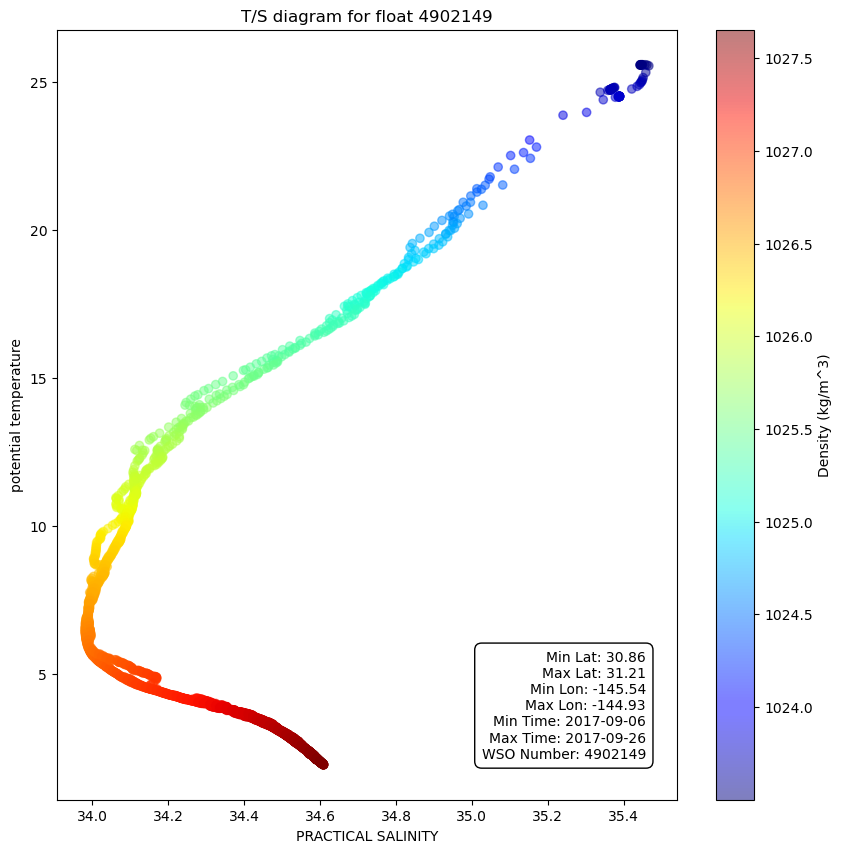

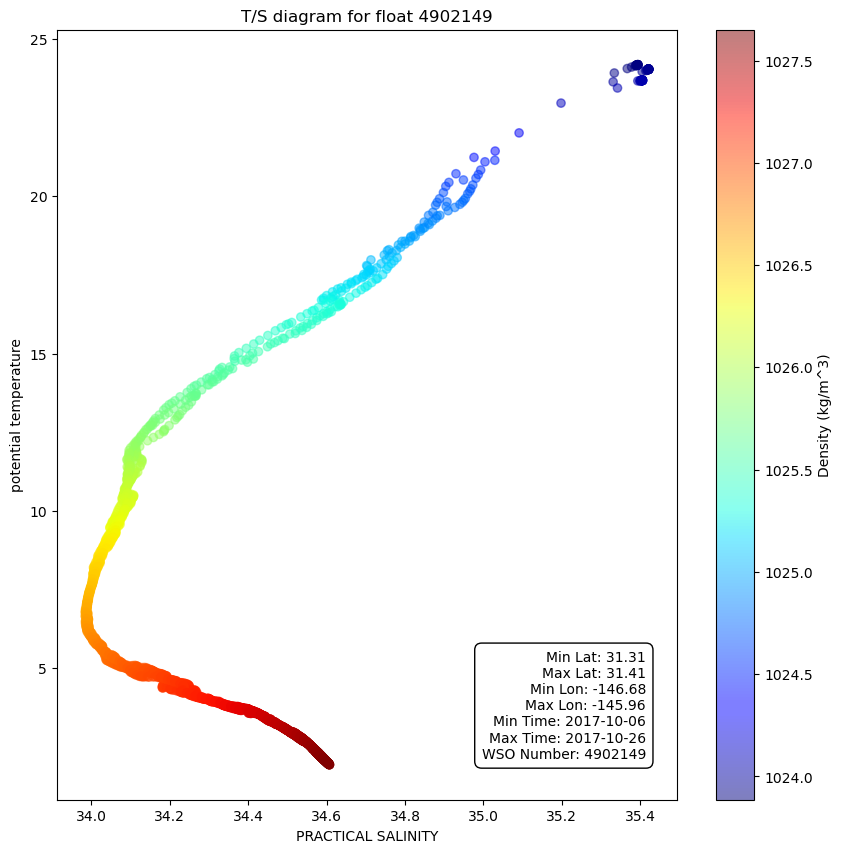

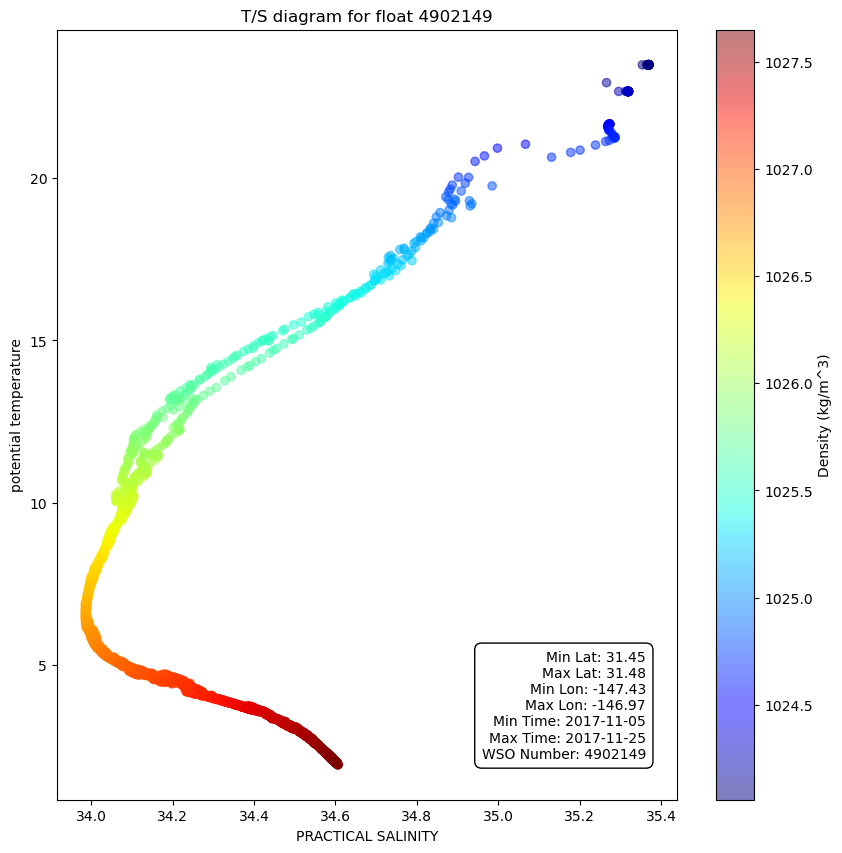

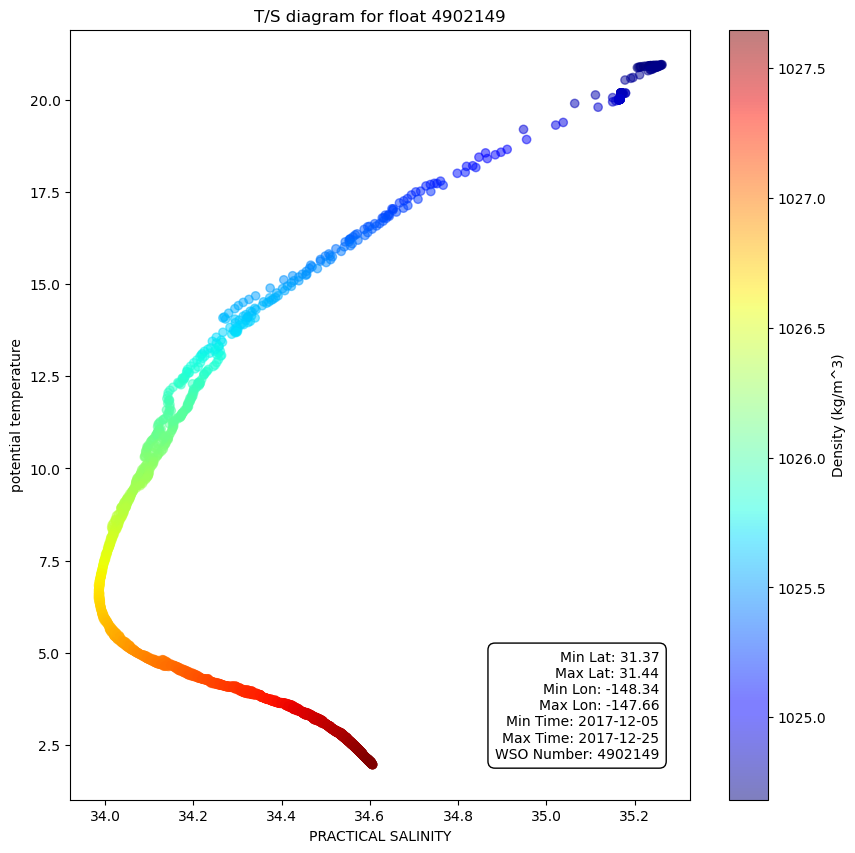

In [8]:
import seawater as sw
import matplotlib.pyplot as plt

date_ranges = {
    4902149: [('2017-01-01', '2017-02-01'), ('2017-02-01', '2017-03-01'), ('2017-03-01', '2017-04-01'), ('2017-04-01', '2017-05-01'),
             ('2017-05-01', '2017-06-01'), ('2017-06-01', '2017-07-01'), ('2017-07-01', '2017-08-01'), ('2017-08-01', '2017-09-01'), ('2017-09-01', '2017-10-01'), ('2017-10-01', '2017-11-01'),
             ('2017-11-01', '2017-12-01'), ('2017-12-01', '2017-12-31')], 
    # Other WSO Identifiers and their date ranges...
}

# Initialize the sliced_data_dict as an empty dictionary
sliced_data_dict = {}

# Loop through each WSO Identifier and its date ranges
for wso_identifier, ranges in date_ranges.items():
    # Initialize a list to store data slices for each date range
    sliced_data_list = []
    apDS = argo_loader.float(wso_identifier).load().data
    data1 = apDS.argo.point2profile()
    data2 = data1.set_xindex("TIME")

    # Iterate through the date ranges for the current WSO Identifier
    for date_range in ranges:
        start_date, end_date = date_range
        # Slice data based on the current date range
        sliced_data = data2.sel(TIME=slice(start_date, end_date))
        # Append the sliced data to the list
        sliced_data_list.append(sliced_data)

    # Append the list of sliced data to the dictionary using the WSO Identifier as the key
    sliced_data_dict[wso_identifier] = sliced_data_list

# Now you can access each list of sliced data for each WSO Identifier using the float identifier (WSO Identifier) as the key
for wso_identifier, sliced_data_list in sliced_data_dict.items():
    # Process each list of sliced data for plotting or further analysis
    for sliced_data in sliced_data_list:
        # Extract variables from sliced_data for plotting
        temp = sliced_data.TEMP.values.flatten()
        psal = sliced_data.PSAL.values.flatten()
        pres = sliced_data.PRES.values.flatten()

        ptmp = sw.ptmp(psal, temp, pres, pr=0)

        t_bins = np.linspace(2, 25, 200)
        s_bins = np.linspace(35, 37.25, 200)

        pden = sw.dens0(psal, temp)

        valid_indices = ~np.isnan(pden)
        pden_clean = pden[valid_indices]
        psal_clean = psal[valid_indices]
        temp_clean = temp[valid_indices]
        ptmp_clean = ptmp[valid_indices]

        fig, ax = plt.subplots(figsize=(10, 10))

        # Directly visualize density using a color map
        sc = ax.scatter(psal_clean, ptmp_clean, c=pden_clean, alpha=0.5, cmap="jet", vmin=pden_clean.min(), vmax=pden_clean.max())

        ax.set_title(f"T/S diagram for float {wso_identifier}")
        ax.set_ylabel("potential temperature")
        ax.set_xlabel(f"{sliced_data.PSAL.long_name}")
        fig.colorbar(sc, label="Density (kg/m^3)")

        max_lat = sliced_data.LATITUDE.max().values
        min_lat = sliced_data.LATITUDE.min().values
        max_lon = sliced_data.LONGITUDE.max().values
        min_lon = sliced_data.LONGITUDE.min().values
        min_time = pd.to_datetime(sliced_data.TIME.min().values).strftime('%Y-%m-%d')
        max_time = pd.to_datetime(sliced_data.TIME.max().values).strftime('%Y-%m-%d')
        wso_identifier = sliced_data.PLATFORM_NUMBER.min().values
    
        text_plot = f"Min Lat: {min_lat:.2f}\nMax Lat: {max_lat:.2f}\nMin Lon: {min_lon:.2f}\nMax Lon: {max_lon:.2f}\nMin Time: {min_time}\nMax Time: {max_time}\nWSO Number: {wso_identifier}"
        ax.text(0.95, 0.05, text_plot, transform=ax.transAxes, ha='right', va='bottom', fontsize=10,
               bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.5'))

plt.show()